#Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
!pip install arch
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_predict
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from sklearn.linear_model import LinearRegression
!pip install pmdarima
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.simplefilter("ignore")
from pylab import rcParams
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
%config InlineBackend.figure_format='retina' #Melhorar a resolução da imagem gerada
from matplotlib import rcParams
import matplotlib
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
from arch import arch_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import ParameterGrid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00


#Carregar dados

In [ ]:
# Carregar o drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load the data
df = pd.read_csv("/content/drive/MyDrive/Mestrado/df_indice_brasil_endogenous_exogenous_red1.csv", sep=',')

serie = df['Close']

print(df.tail())

      Unnamed: 0        Date      Close      High       Low     Volume  \
2719        2719  2023-12-21  132182.01  0.241381  0.239069  18.335533   
2720        2720  2023-12-22  132752.93  0.120690  0.119534   9.167767   
2721        2721  2023-12-26  133532.92  0.060345  0.059767   4.583883   
2722        2722  2023-12-27  134193.72  0.030173  0.029884   2.291942   
2723        2723  2023-12-28  134185.24  0.000000  0.000000   0.000000   

           USD  
2719  4.914600  
2720  4.881800  
2721  4.869744  
2722  4.813500  
2723  4.813500  


In [ ]:
df.head()

Unnamed: 0        Date     Close     High      Low     Volume     USD
0           0  2013-01-02  62550.10  62887.0  60990.0  3739800.0  2.0456
1           1  2013-01-03  63312.46  63473.0  62341.0  3355800.0  2.0456
2           2  2013-01-04  62523.06  63314.0  62415.0  6233800.0  2.0487
3           3  2013-01-07  61932.54  62699.0  61639.0  3985800.0  2.0324
4           4  2013-01-08  61127.84  62265.0  61081.0  3840600.0  2.0264

In [ ]:
# @title
sns.set_style("whitegrid")

# Set Default Fonts
rcParams["font.family"] = "serif"
rcParams["font.sans-serif"] = ["Time New Roman"]

# Set Default font sizes
small_size = 12
medium_size = 14
large_size = 16

# # Change the font size for individual elements
matplotlib.rc("font", size=small_size)  # controls default text sizes
matplotlib.rc("axes", titlesize=small_size)  # fontsize of the axes title
matplotlib.rc("axes", labelsize=small_size)  # fontsize of the x and y labels
matplotlib.rc("xtick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("ytick", labelsize=small_size)  # fontsize of the tick labels
matplotlib.rc("legend", fontsize=small_size)  # legend fontsize
matplotlib.rc("axes", titlesize=large_size)  # title fontsize

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1)

In [ ]:
#serie = serie.str.replace('.', '').str.replace(',', '.').astype(float)

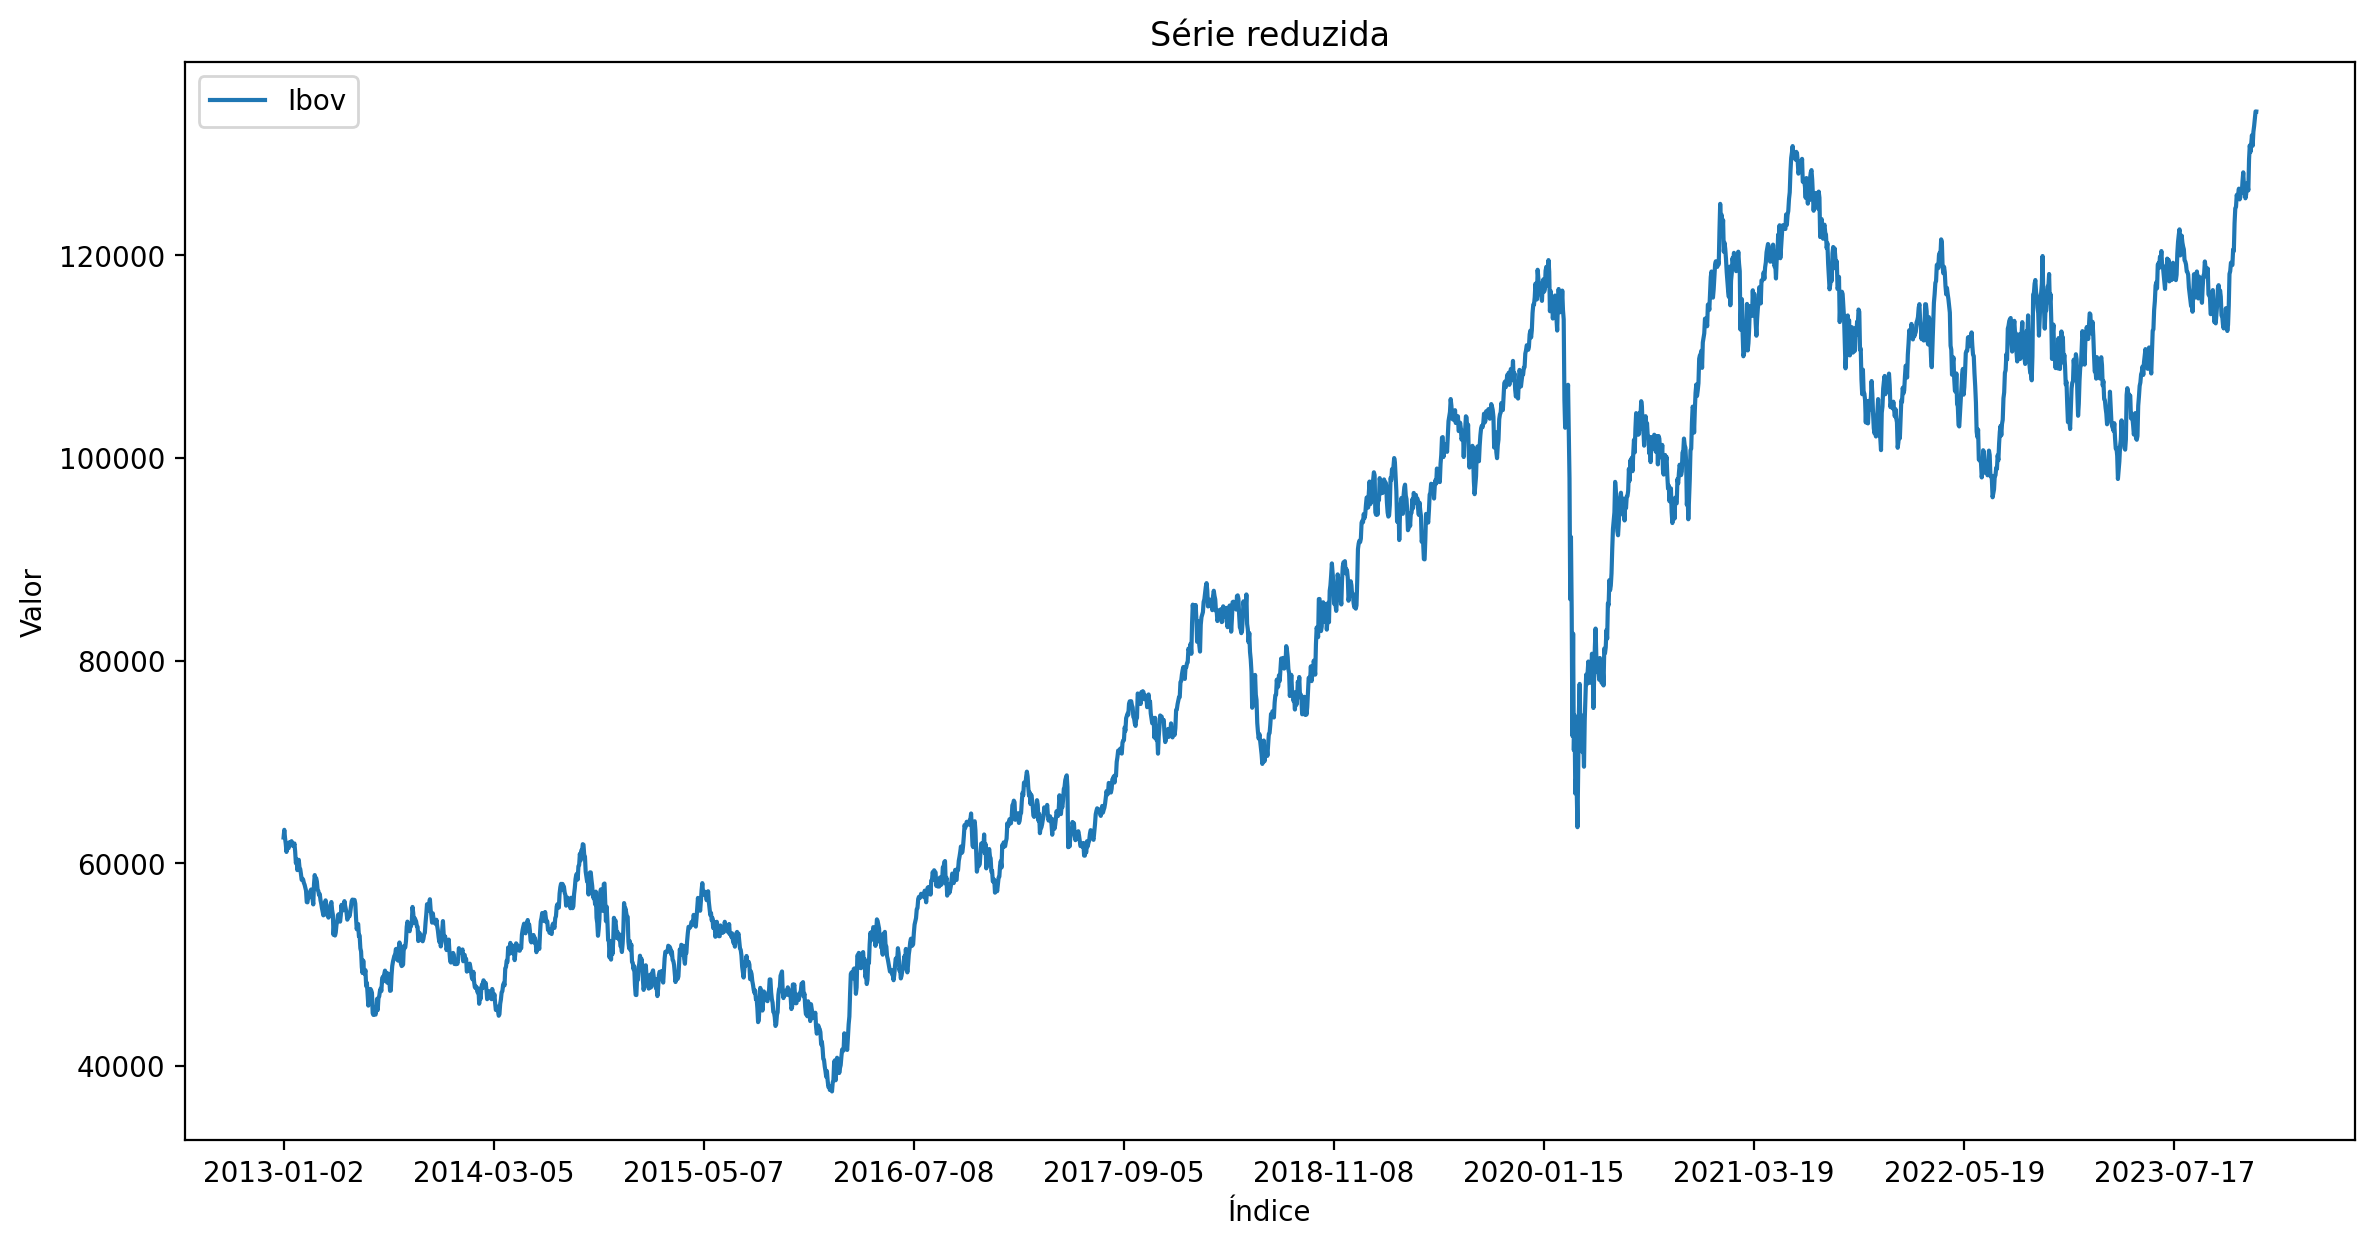

In [ ]:

# Plotar os dados da série
plt.figure(figsize=(14, 7))
plt.plot(serie, label='Ibov')
#plt.plot(df['Close'], label='YahooFinance')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Série reduzida')
plt.legend()

# Ajustar o eixo x para exibir as datas corretamente
plt.xticks(np.arange(df.index[0], df.index[-1], step=290), df['Date'][np.arange(df.index[0], df.index[-1], step=290)])

plt.show()

In [ ]:
# @title
# Supondo que df é o DataFrame original
lista = []

lista.append(serie.median())
lista.append(serie.mean())
lista.append(serie.std())
lista.append(serie.var())
lista.append(serie.skew())
lista.append(serie.kurt())
lista.append(serie.mode().iloc[0])  # Seleciona o primeiro modo
lista.append(serie.quantile(0.25))
lista.append(serie.quantile(0.5))
lista.append(serie.quantile(0.75))

# Nomes das estatísticas
nomes = ['Mediana', 'Média', 'Desvio Padrão', 'Variância', 'Assimetria', 'Curtose', 'Moda', '1º Quartil', 'Mediana (2º Quartil)', '3º Quartil']

# Cria um DataFrame a partir da lista e adiciona os nomes das estatísticas
lista_df = pd.DataFrame({'Estatística': nomes, 'Valores': lista})

# Arredonda os valores para 4 casas decimais
lista_df['Valores'] = lista_df['Valores'].map(lambda df: f"{df:.4f}")

# Visualiza o DataFrame de forma organizada
lista_df

Estatística         Valores
0               Mediana      79424.8150
1                 Média      81770.5412
2         Desvio Padrão      26768.9875
3             Variância  716578689.3297
4            Assimetria          0.1003
5               Curtose         -1.5058
6                  Moda      76402.0800
7            1º Quartil      54782.6025
8  Mediana (2º Quartil)      79424.8150
9            3º Quartil     107277.7225

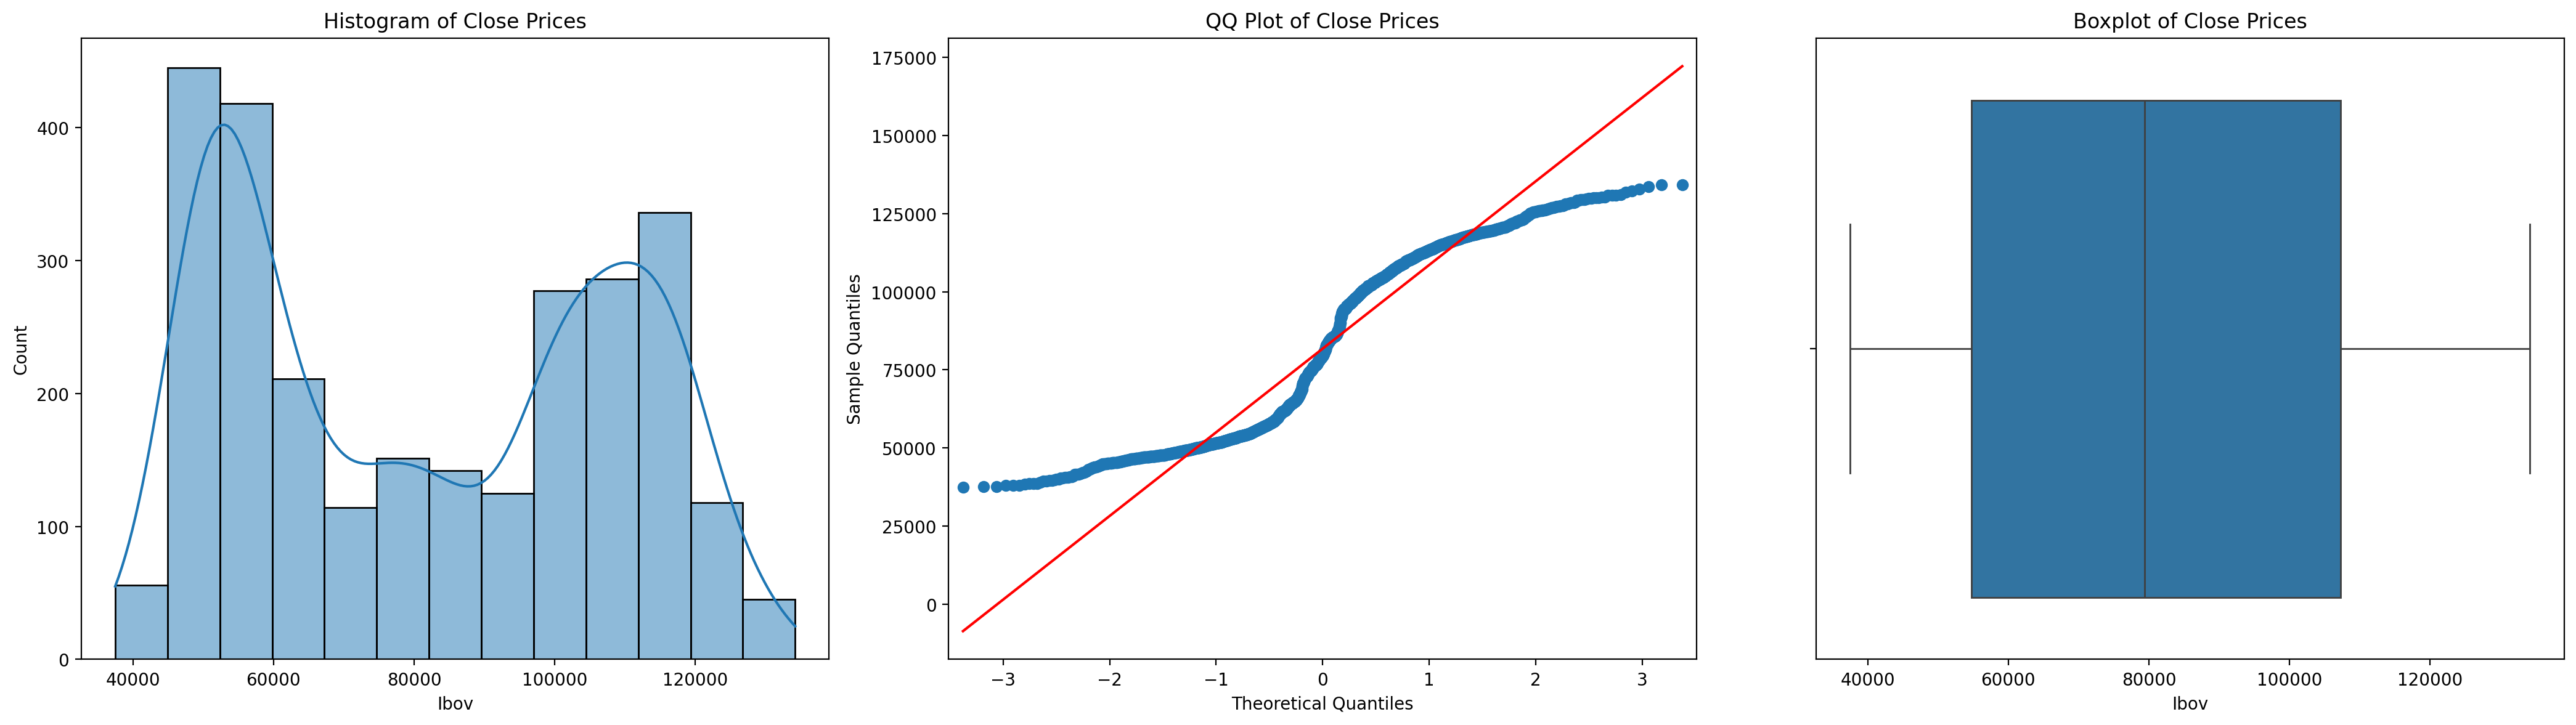

In [ ]:
# @title
# Plot Histogram, QQ plot, and Boxplot of the series
fig, ax = plt.subplots(1, 3, figsize=(21, 6))

# Histogram with KDE
sns.histplot(serie, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Close Prices')

# QQ plot
qqplot(serie, line='s', ax=ax[1])
ax[1].set_title('QQ Plot of Close Prices')

# Boxplot
sns.boxplot(x=serie, ax=ax[2])
ax[2].set_title('Boxplot of Close Prices')

plt.tight_layout()
plt.show()

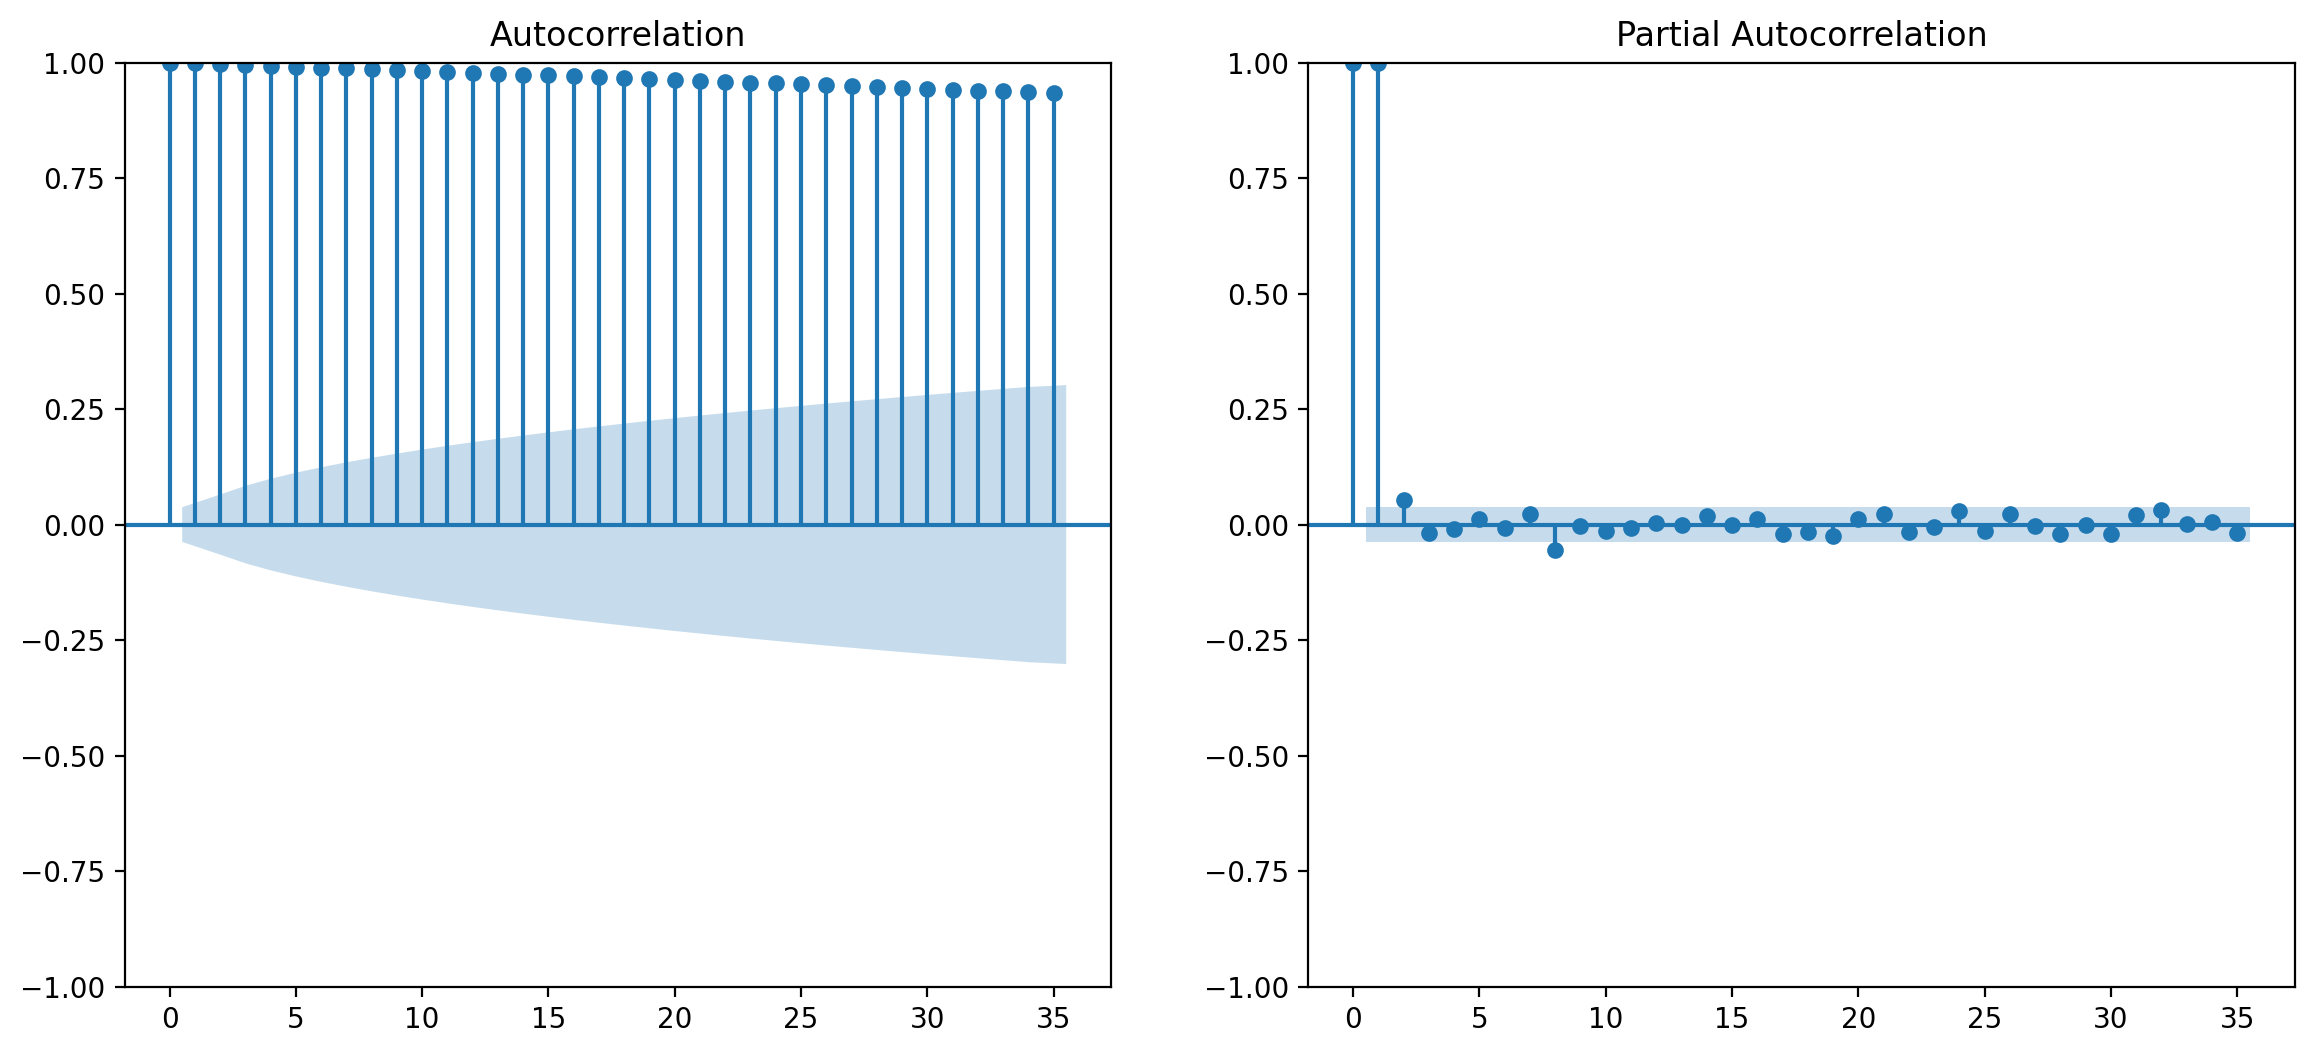

In [ ]:
# Supondo que 'serie' é sua série temporal
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plota ACF no primeiro subplot
plot_acf(serie, ax=ax[0])

# Plota PACF no segundo subplot
plot_pacf(serie, ax=ax[1])

# Mostra os gráficos
plt.show()

In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

In [ ]:
# @title
train

0        62550.10
1        63312.46
2        62523.06
3        61932.54
4        61127.84
          ...    
2038    116633.72
2039    115253.31
2040    117518.44
2041    117498.87
2042    117623.58
Name: Close, Length: 2043, dtype: float64

In [ ]:
# Fit the ARIMA model using auto_arima
#O IBOV não possui sazonalidade evidente
arima_model = pm.auto_arima(train, seasonal=False, error_action='ignore', suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

#o seasonal True e False retornaram os mesmos valores
# SARIMAX(3, 1, 3)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2043
Model:               SARIMAX(3, 1, 3)   Log Likelihood              -17396.780
Date:                Tue, 05 Nov 2024   AIC                          34807.560
Time:                        14:39:11   BIC                          34846.912
Sample:                             0   HQIC                         34821.994
                               - 2043                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6169      0.091     -6.758      0.000      -0.796      -0.438
ar.L2          0.6828      0.120      5.693      0.000       0.448       0.918
ar.L3          0.6416      0.075      8.579      0.0

#Sem Expanding Window

In [ ]:
# Ajuste o índice para ser uma sequência de datas
serie.index = pd.date_range(start=df['Date'][1], periods=len(serie), freq='D')

# Divida os dados em conjuntos de treinamento e teste
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

# Defina a ordem do modelo
order = (3,1,3)

# Crie um dicionário para armazenar os valores reais e previstos
pred_dict = {'Real': [], 'Pred': []}

print('train=%d, test=%d' % (len(train), len(test)))

# Ajuste o modelo SARIMAX aos dados de treinamento
model = SARIMAX(train,
                order=order,
                freq='D',).fit()

# Faça previsões para o conjunto de teste
predictions = model.forecast(steps=len(test))#[0] funciona se tiver em looping

# Adicione os valores reais e previstos ao dicionário
pred_dict['Real'].extend(test.values)
pred_dict['Pred'].extend(predictions)

# Crie um DataFrame a partir do dicionário
df_pred = pd.DataFrame(pred_dict)

train=2179, test=545


In [ ]:
# Calculando as métricas
rmse = round(sqrt(mean_squared_error(df_pred['Real'], df_pred['Pred'])), 4)
mae = round(mean_absolute_error(df_pred['Real'], df_pred['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_pred['Real'], df_pred['Pred']), 4)
mse = round(mean_squared_error(df_pred['Real'], df_pred['Pred']), 4)
r2 = round(r2_score(df_pred['Real'], df_pred['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)


RMSE: 7916.1253 MAE: 6215.0669 MAPE: 5.43 MSE: 62665040.2752 R2: -0.2172


In [ ]:
# Real X Predict sem expanding window

# Plotar os dados reais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(df_pred['Real'], label='Real')
plt.plot(df_pred['Pred'], label='Previsão')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparação entre os valores reais e as previsões')
plt.legend()

plt.title(f'MAPE: %.4f{mape*100}')
plt.suptitle('SARIMA Validation')
combined_title = "MAPE  = %.2f e RMSE = %.4f" % (mape*100, rmse)
plt.title(combined_title, size=13)

plt.tight_layout()

file_path = '/content/drive/MyDrive/Mestrado/Resultados/Estatística/MAPE do SARIMA_Validation.png'#, dpi=300

# Ajustar o eixo x para exibir as datas corretamente
plt.xticks(np.arange(1, len(test), step=60), df['Date'][np.arange(len(df['Date'])-len(test), len(df['Date']), step=60)], rotation=45, ha='right')
#plt.savefig(file_path)

plt.show()

#Verificar motivo do pred estar em linha reta e o mape não ser alto

NameError: name 'df_pred' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Salvar o DataFrame em um arquivo Excel no caminho especificado
df_pred.to_excel('/content/drive/MyDrive/Mestrado/Resultados/Estatística/df_pred.xlsx', index=False)


NameError: name 'df_pred' is not defined

#Com Expanding Window

##Close

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
#trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        model = SARIMAX(train['Close'],
                        order=order,
                        #trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        y = model.forecast(steps=len(test))[0]
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
   # residuals = model.resid
    #model.plot_diagnostics()
    #fig = plt.gcf()
    #fig.set_size_inches(15, 10)
   # plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

# Salvar o DataFrame em um arquivo Excel no caminho especificado
df_exp_window.to_excel('/content/drive/MyDrive/Mestrado/Resultados/Estatística/df_predict.xlsx', index=False)

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/Mestrado/Resultados/Estatística'

In [ ]:
# Salvar o DataFrame em um arquivo Excel no caminho especificado
df_exp_window.to_excel('/content/drive/MyDrive/Mestrado/Estatística/df_predict.xlsx', index=False)

In [ ]:
import time
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Supondo que o DataFrame `df` já esteja carregado
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

# Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)

def expanding_window():
    # Executar apenas a primeira iteração
    i = num_train_samples
    train, test = df[0:i], df[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

    # Medir o tempo de carregamento
    start_time = time.time()
    model = SARIMAX(train['Close'],
                    order=order,
                    freq='D',
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit(disp=-1)
    load_time = time.time() - start_time
    print(f"Tempo de carregamento: {load_time:.4f} segundos")

    # Medir o tempo de treino
    start_time = time.time()
    y = model.forecast(steps=len(test))[0]
    train_time = time.time() - start_time
    print(f"Tempo de treino: {train_time:.4f} segundos")

    predictions.append(y)

expanding_window()


train=2043, test=1
Tempo de carregamento: 1.1089 segundos
Tempo de treino: 0.0059 segundos


In [ ]:
# Converter as listas de métricas e desvios padrão em DataFrame do pandas
metrics_df = pd.DataFrame(errors)

file_path = f'/content/drive/MyDrive/Mestrado/Estatística/Metricas_exp_window_close.csv'
errors['MAPE'] = errors['MAPE']*100

metrics_df.to_csv(file_path, index=False)

In [ ]:
df = pd.read_csv(f'/content/drive/MyDrive/Mestrado/Estatística/Metricas_exp_window_close.csv')

# Encontra a linha com o menor valor na coluna MAPE
#min_mape_row = df.loc[df['MAPE'].idxmin()]

# Exibe o resultado
print(df)


            RMSE          MAE      MAPE        R2
0     426.044854   420.491475  0.003562 -0.754297
1     576.121892   545.473494  0.004606 -0.519312
2     665.432234   629.254350  0.005300 -0.217796
3     738.837364   699.179170  0.005868  0.311715
4     731.807965   698.582015  0.005850  0.522970
..           ...          ...       ...       ...
675  1373.621071  1088.896488  0.009703  0.968855
676  1372.896962  1088.372726  0.009697  0.969132
677  1372.234031  1087.956445  0.009691  0.969423
678  1371.496604  1087.403813  0.009685  0.969730
679  1370.491818  1085.908475  0.009671  0.970041

[680 rows x 4 columns]


In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)


RMSE: 1370.4918 MAE: 1085.9085 MAPE: 0.97 MSE: 1878247.8235 R2: 0.97


In [ ]:
real_pred = pd.read_excel('/content/drive/MyDrive/Mestrado/Estatística/df_pred.xlsx')

In [ ]:
real_pred

Real           Pred
0    118313.23  117629.674575
1    117669.90  117606.582738
2    118811.74  117717.442500
3    119297.13  117637.198006
4    120294.68  117747.577016
..         ...            ...
676  132182.01  117894.387909
677  132752.93  117894.387909
678  133532.92  117894.387909
679  134193.72  117894.387909
680  134185.24  117894.387909

[681 rows x 2 columns]

In [ ]:
# Plotar os dados reais e as previsões
plt.figure(figsize=(14, 7))
plt.plot(real_pred['Real'], label='Real')
plt.plot(real_pred['Pred'], label='Previsão')
plt.xlabel('Date')
plt.ylabel('Valor')
plt.suptitle('Previsões ARIMA exp. window')
plt.legend()

# Ajustar o eixo x para exibir as datas corretamente
#plt.xticks(np.arange(1, len(test), step=90), df['Date'][np.arange(len(df['Date'])-len(test), len(df['Date']), step=90)])
#df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

#Ajustar o eixo x para exibir as datas corretamente
plt.xticks(np.arange(df.index[-681], df.index[-1], step=90), df['Date'][np.arange(df.index[-681], df.index[0], step=90)])

plt.show()

In [ ]:
# Plotando o gráfico do erro ao longo dos treinos
plt.figure(figsize=(14, 7))
plt.plot(errors['RMSE'], label='RMSE')
plt.plot(errors['MAE'], label='MAE')
plt.xlabel('Date')
plt.ylabel('Erro')
plt.title('Erro ao longo dos Treinos')
plt.legend()

# Ajustar o eixo x para exibir as datas corretamente
#plt.xticks(np.arange(1, len(test), step=90), df['Date'][np.arange(len(df['Date'])-len(test), len(df['Date']), step=90)])

#Ajustar o eixo x para exibir as datas corretamente
plt.xticks(np.arange(df.index[0], df.index[-1], step=290), df['Date'][np.arange(df.index[0], df.index[-1], step=290)])

plt.show()

##High


train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

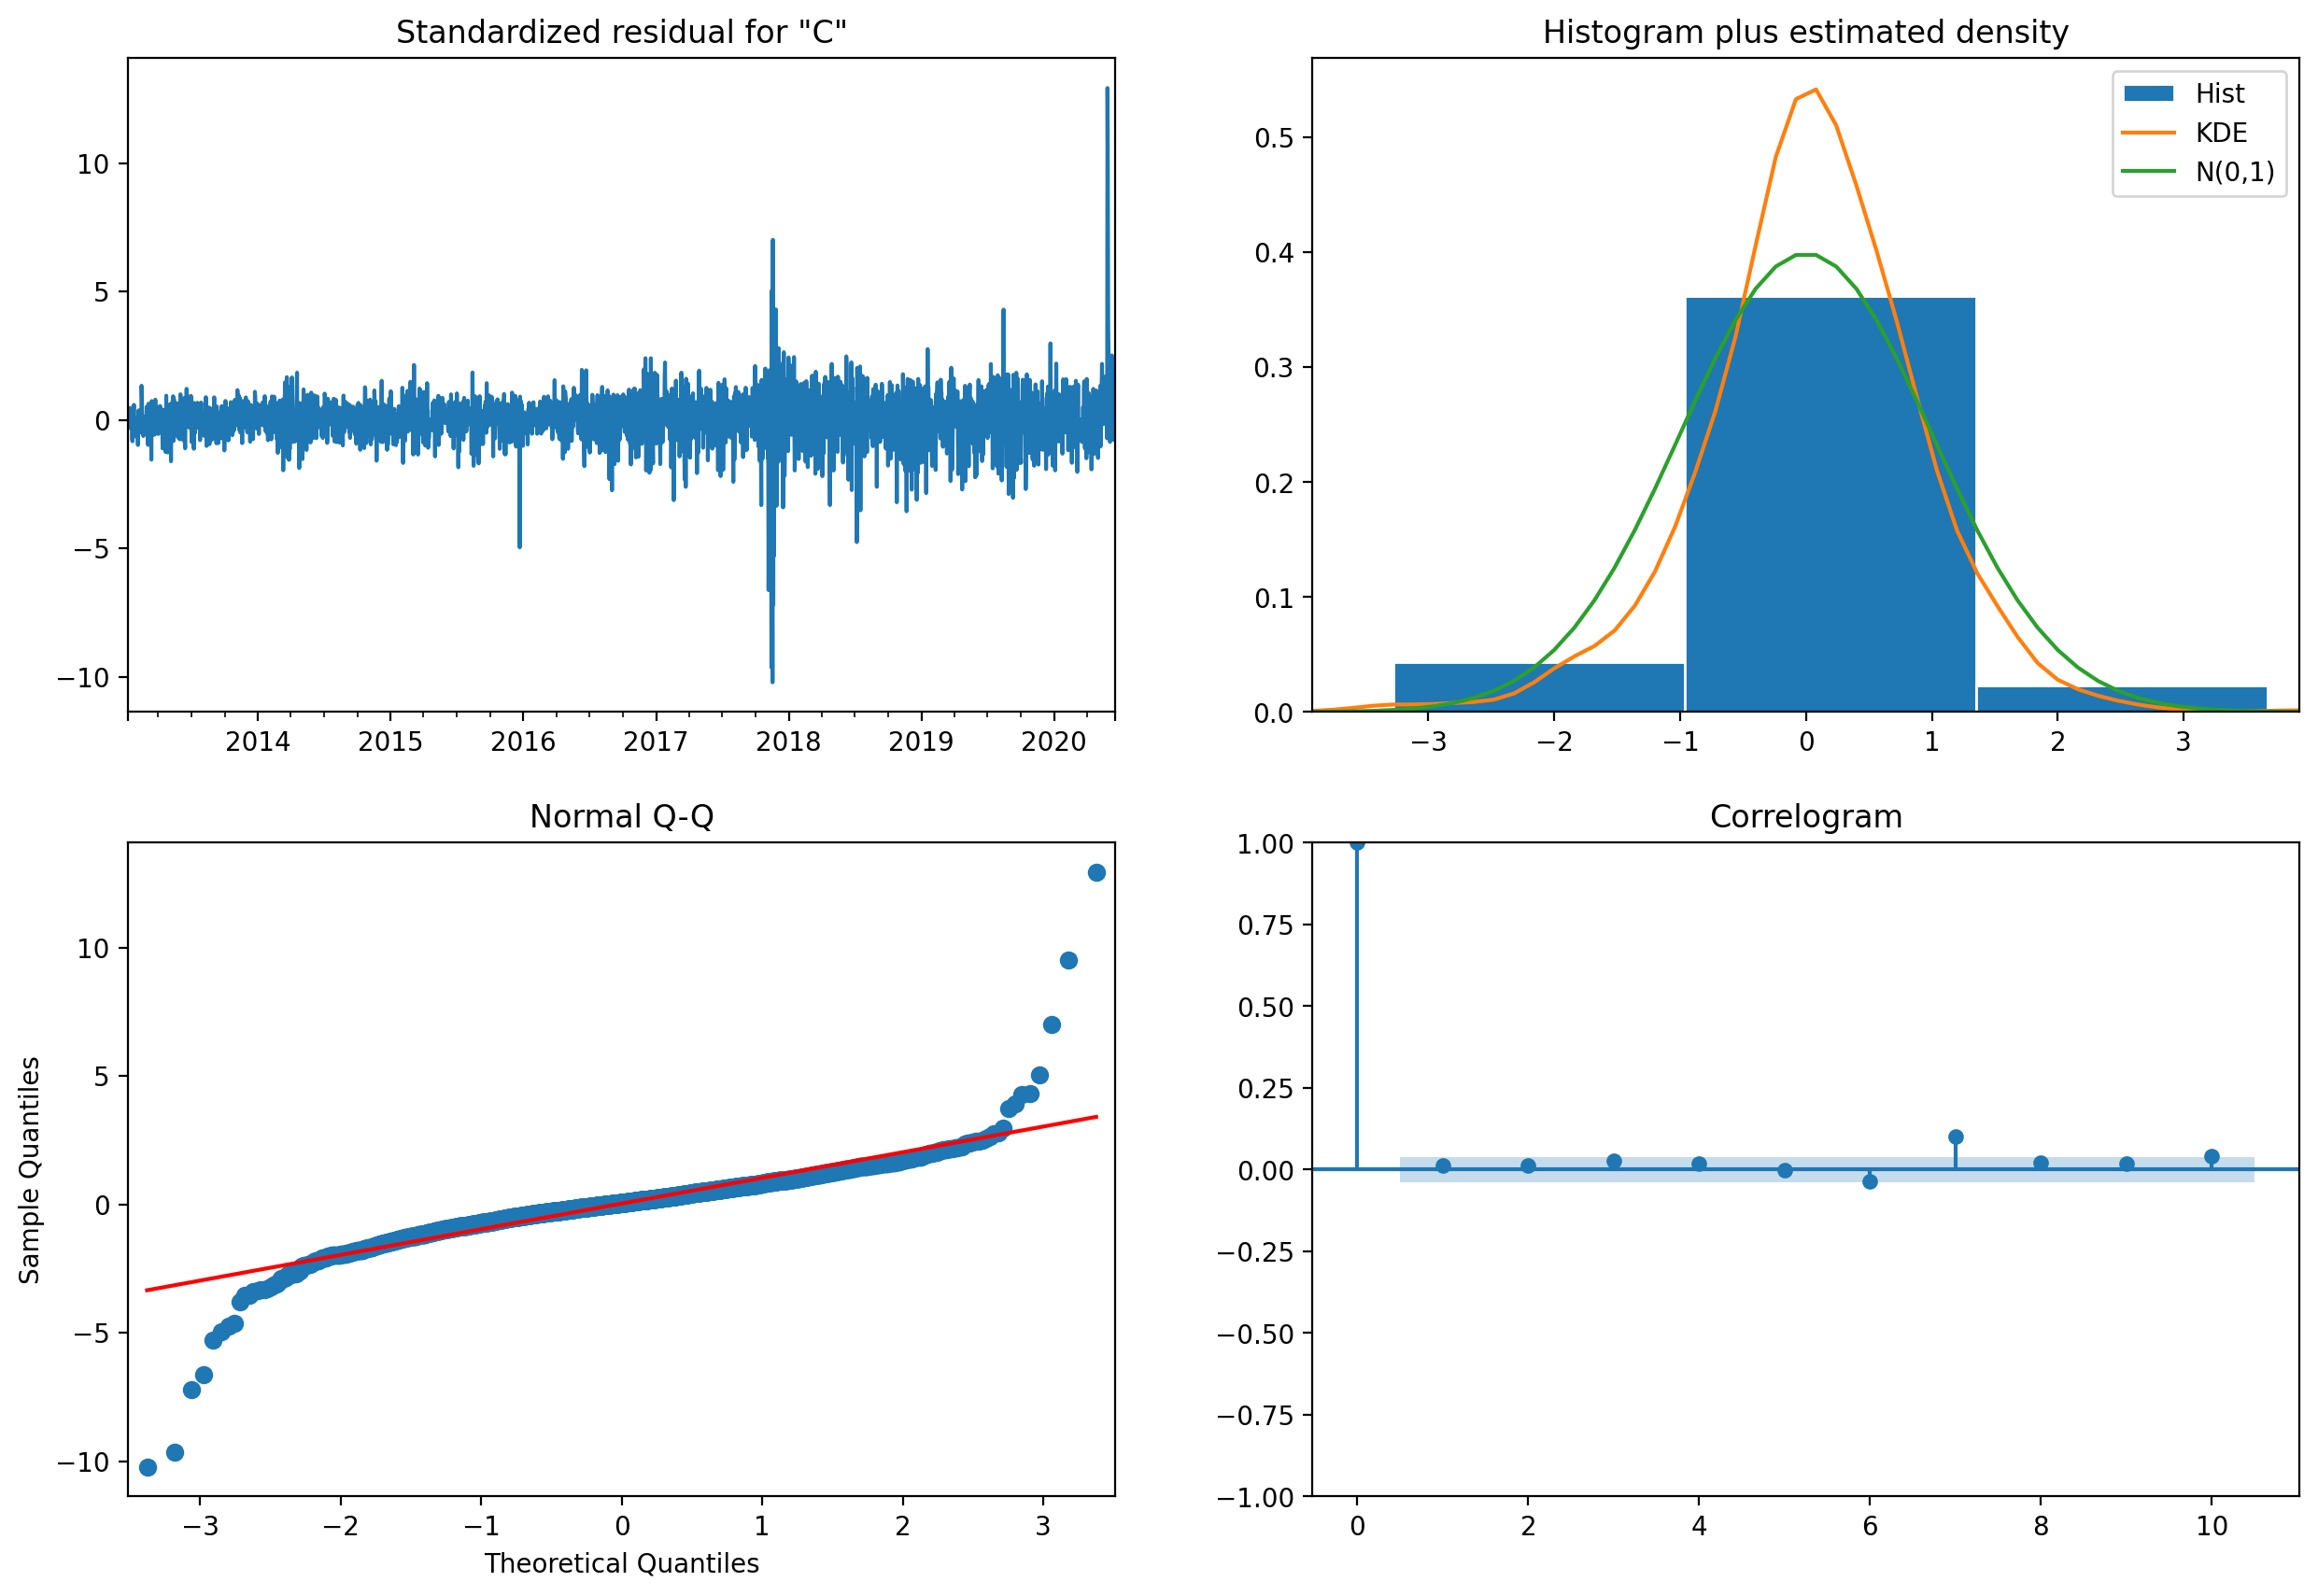

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['High']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['High']])[0]  # Inclui 'High' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Exibindo os resultados finais das métricas de erro
print("Métricas de erro finais:")
print("RMSE:", errors['RMSE'][-1])
print("MAE:", errors['MAE'][-1])
print("MAPE:", errors['MAPE'][-1] * 100)
print("R2:", errors['R2'][-1])

Métricas de erro finais:
RMSE: 2698.852880893017
MAE: 793.6330128357511
MAPE: 0.6934981867738653
R2: 0.8838204858547795


In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2698.8529 MAE: 793.633 MAPE: 0.69 MSE: 7283806.8727 R2: 0.8838


In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

# Configurações de plotagem e warnings
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena e "Close" como endógena
# Convertendo a coluna 'Date' para datetime e definindo como índice
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Função para janela expansiva com SARIMAX e variáveis exógenas
def expanding_window(df, order, num_train_samples, n_records):
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}
    predictions = []

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['High']],
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['High']])[0]
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[-1]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    plt.show()

    return df_exp_window, errors

# Definindo os parâmetros do modelo e os tamanhos de treino e teste
train_size = int(len(df) * 0.75)
num_train_samples = train_size
n_records = len(df)
order = (3, 1, 3)

# Chamando a função expanding_window para calcular as métricas e ajustar o modelo SARIMAX com variáveis exógenas
df_exp_window, errors = expanding_window(df, order, num_train_samples, n_records)

# Exibindo os resultados finais das métricas de erro
print("Métricas de erro finais:")
print("RMSE:", errors['RMSE'][-1])
print("MAE:", errors['MAE'][-1])
print("MAPE:", errors['MAPE'][-1] * 100)
print("R2:", errors['R2'][-1])

train=2043, test=1


KeyError: 0

##Low

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

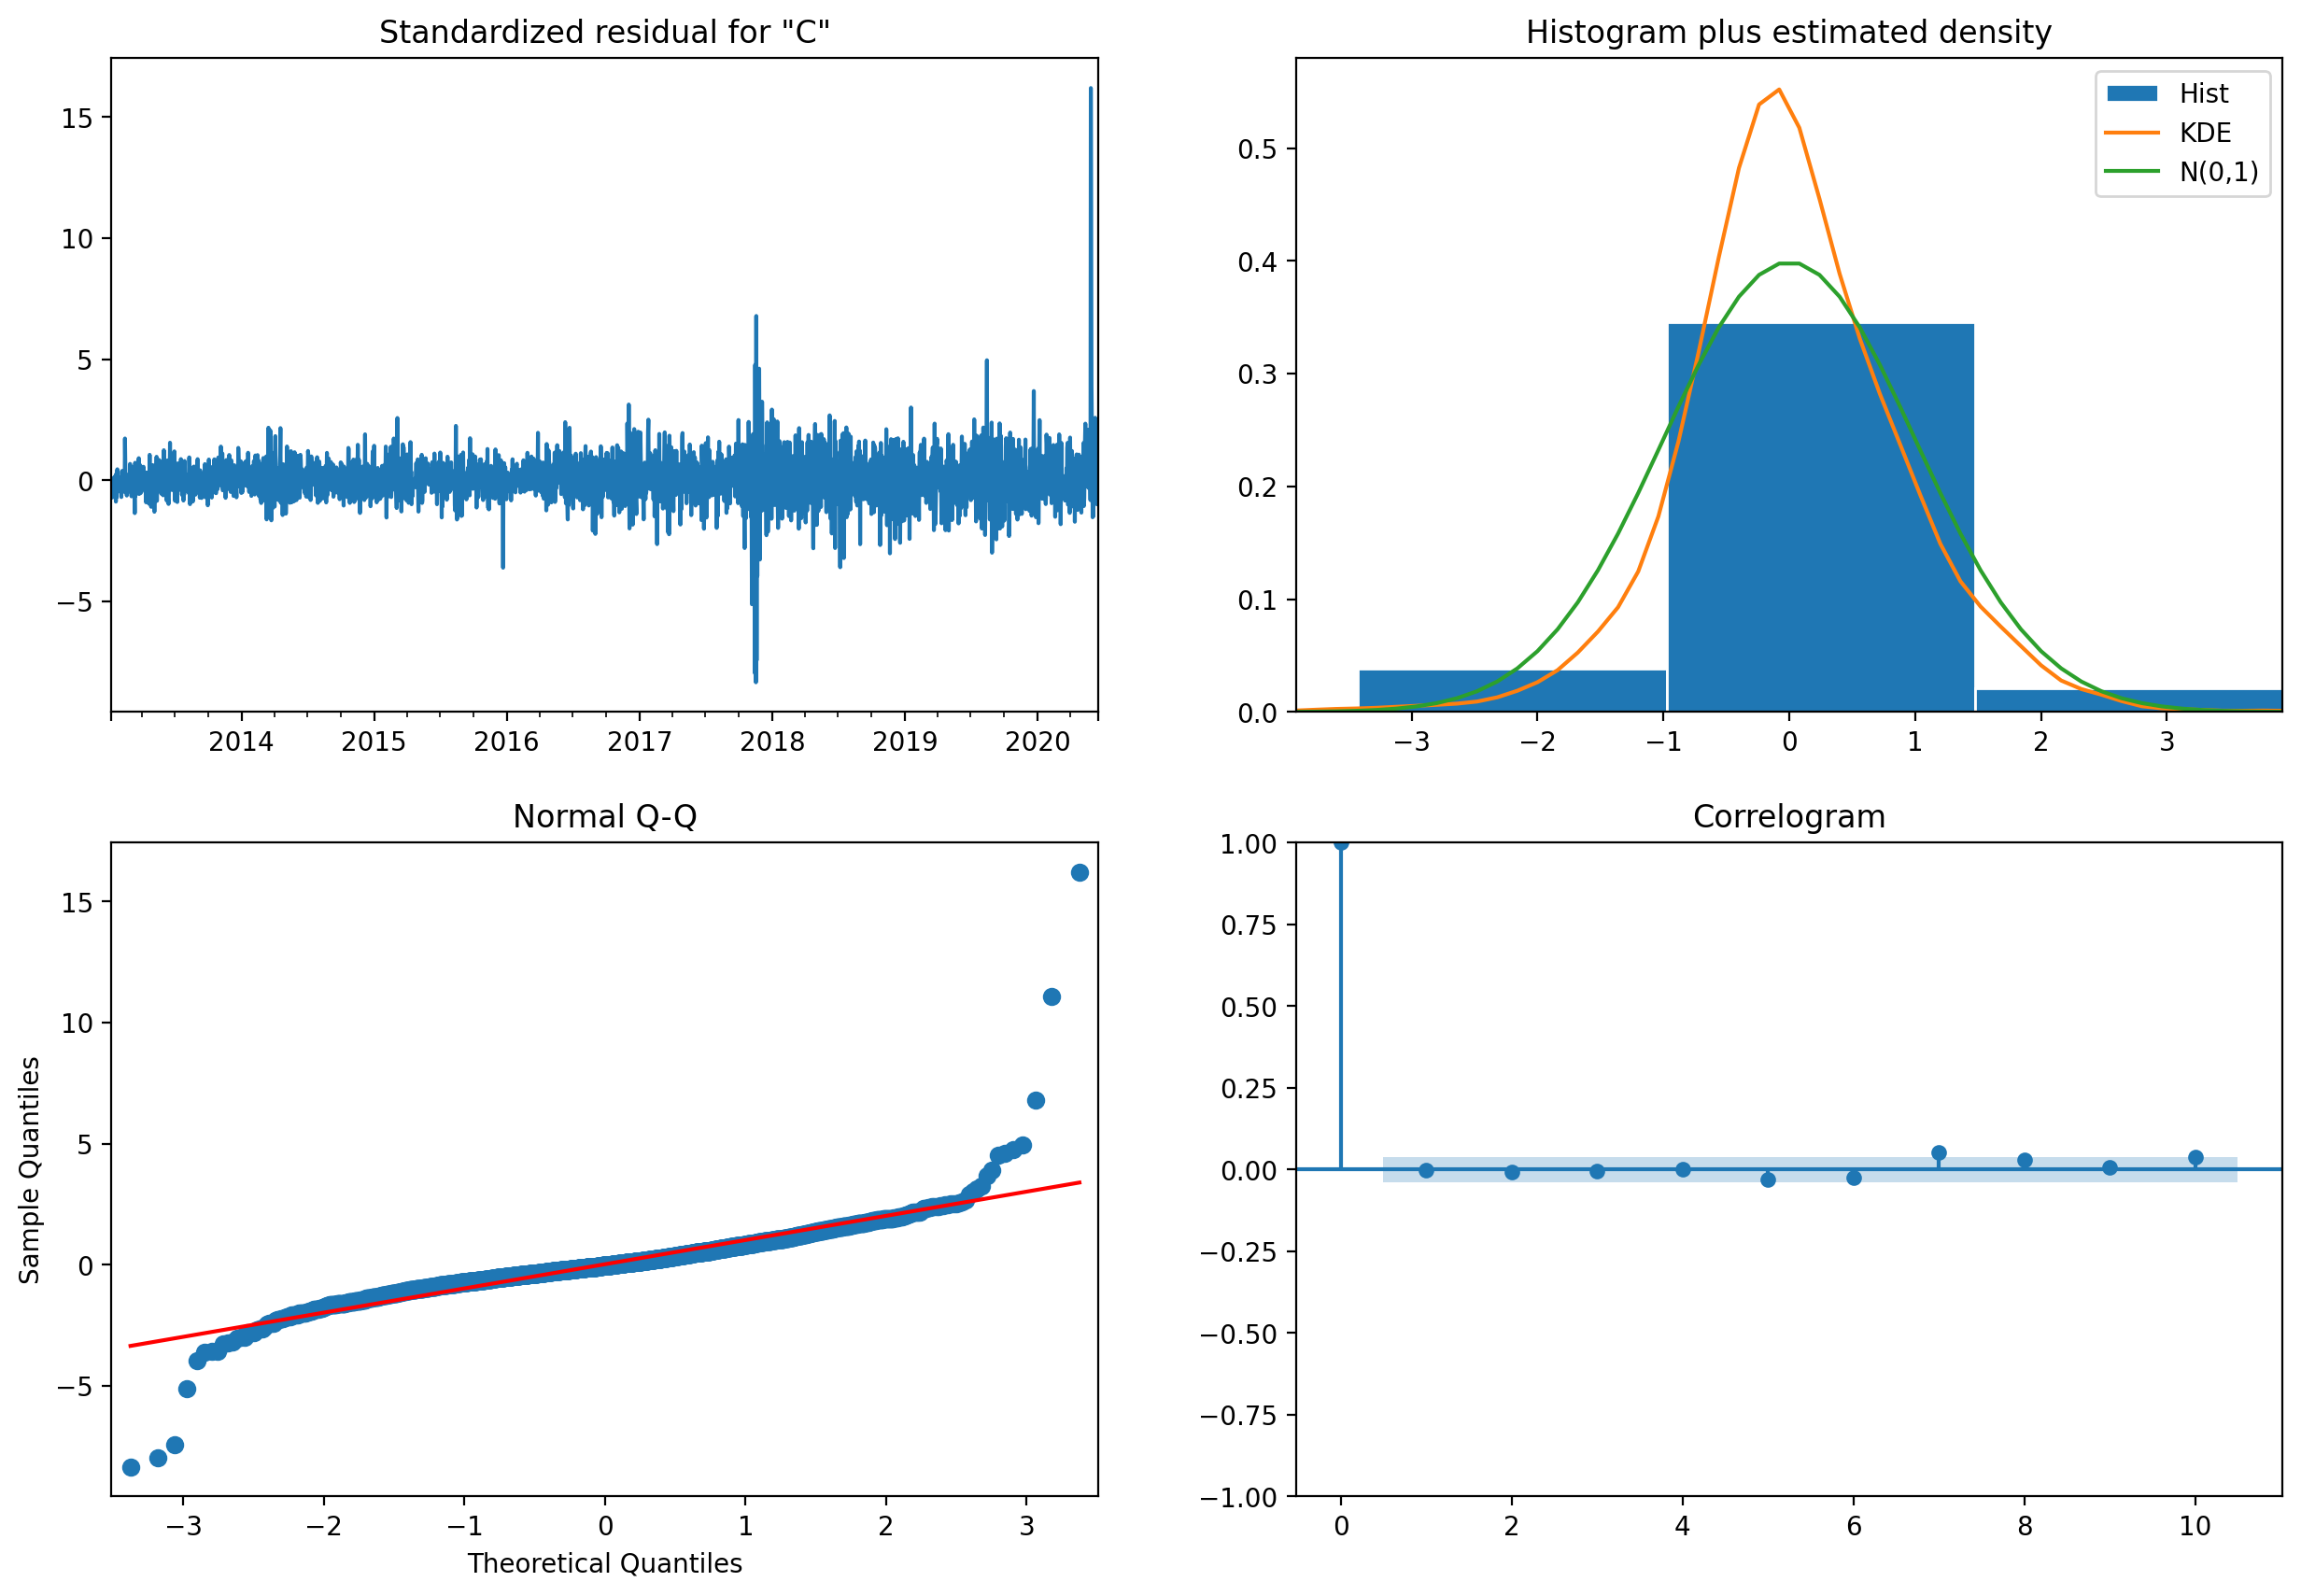

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "Low" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'Low'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['Low']],  # Adiciona a variável exógena 'Low'
                        #trend= 's',
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['Low']])[0]  # Inclui 'Low' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()


In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2608.2509 MAE: 751.7891 MAPE: 0.65 MSE: 6802972.7738 R2: 0.8915


##Volume

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

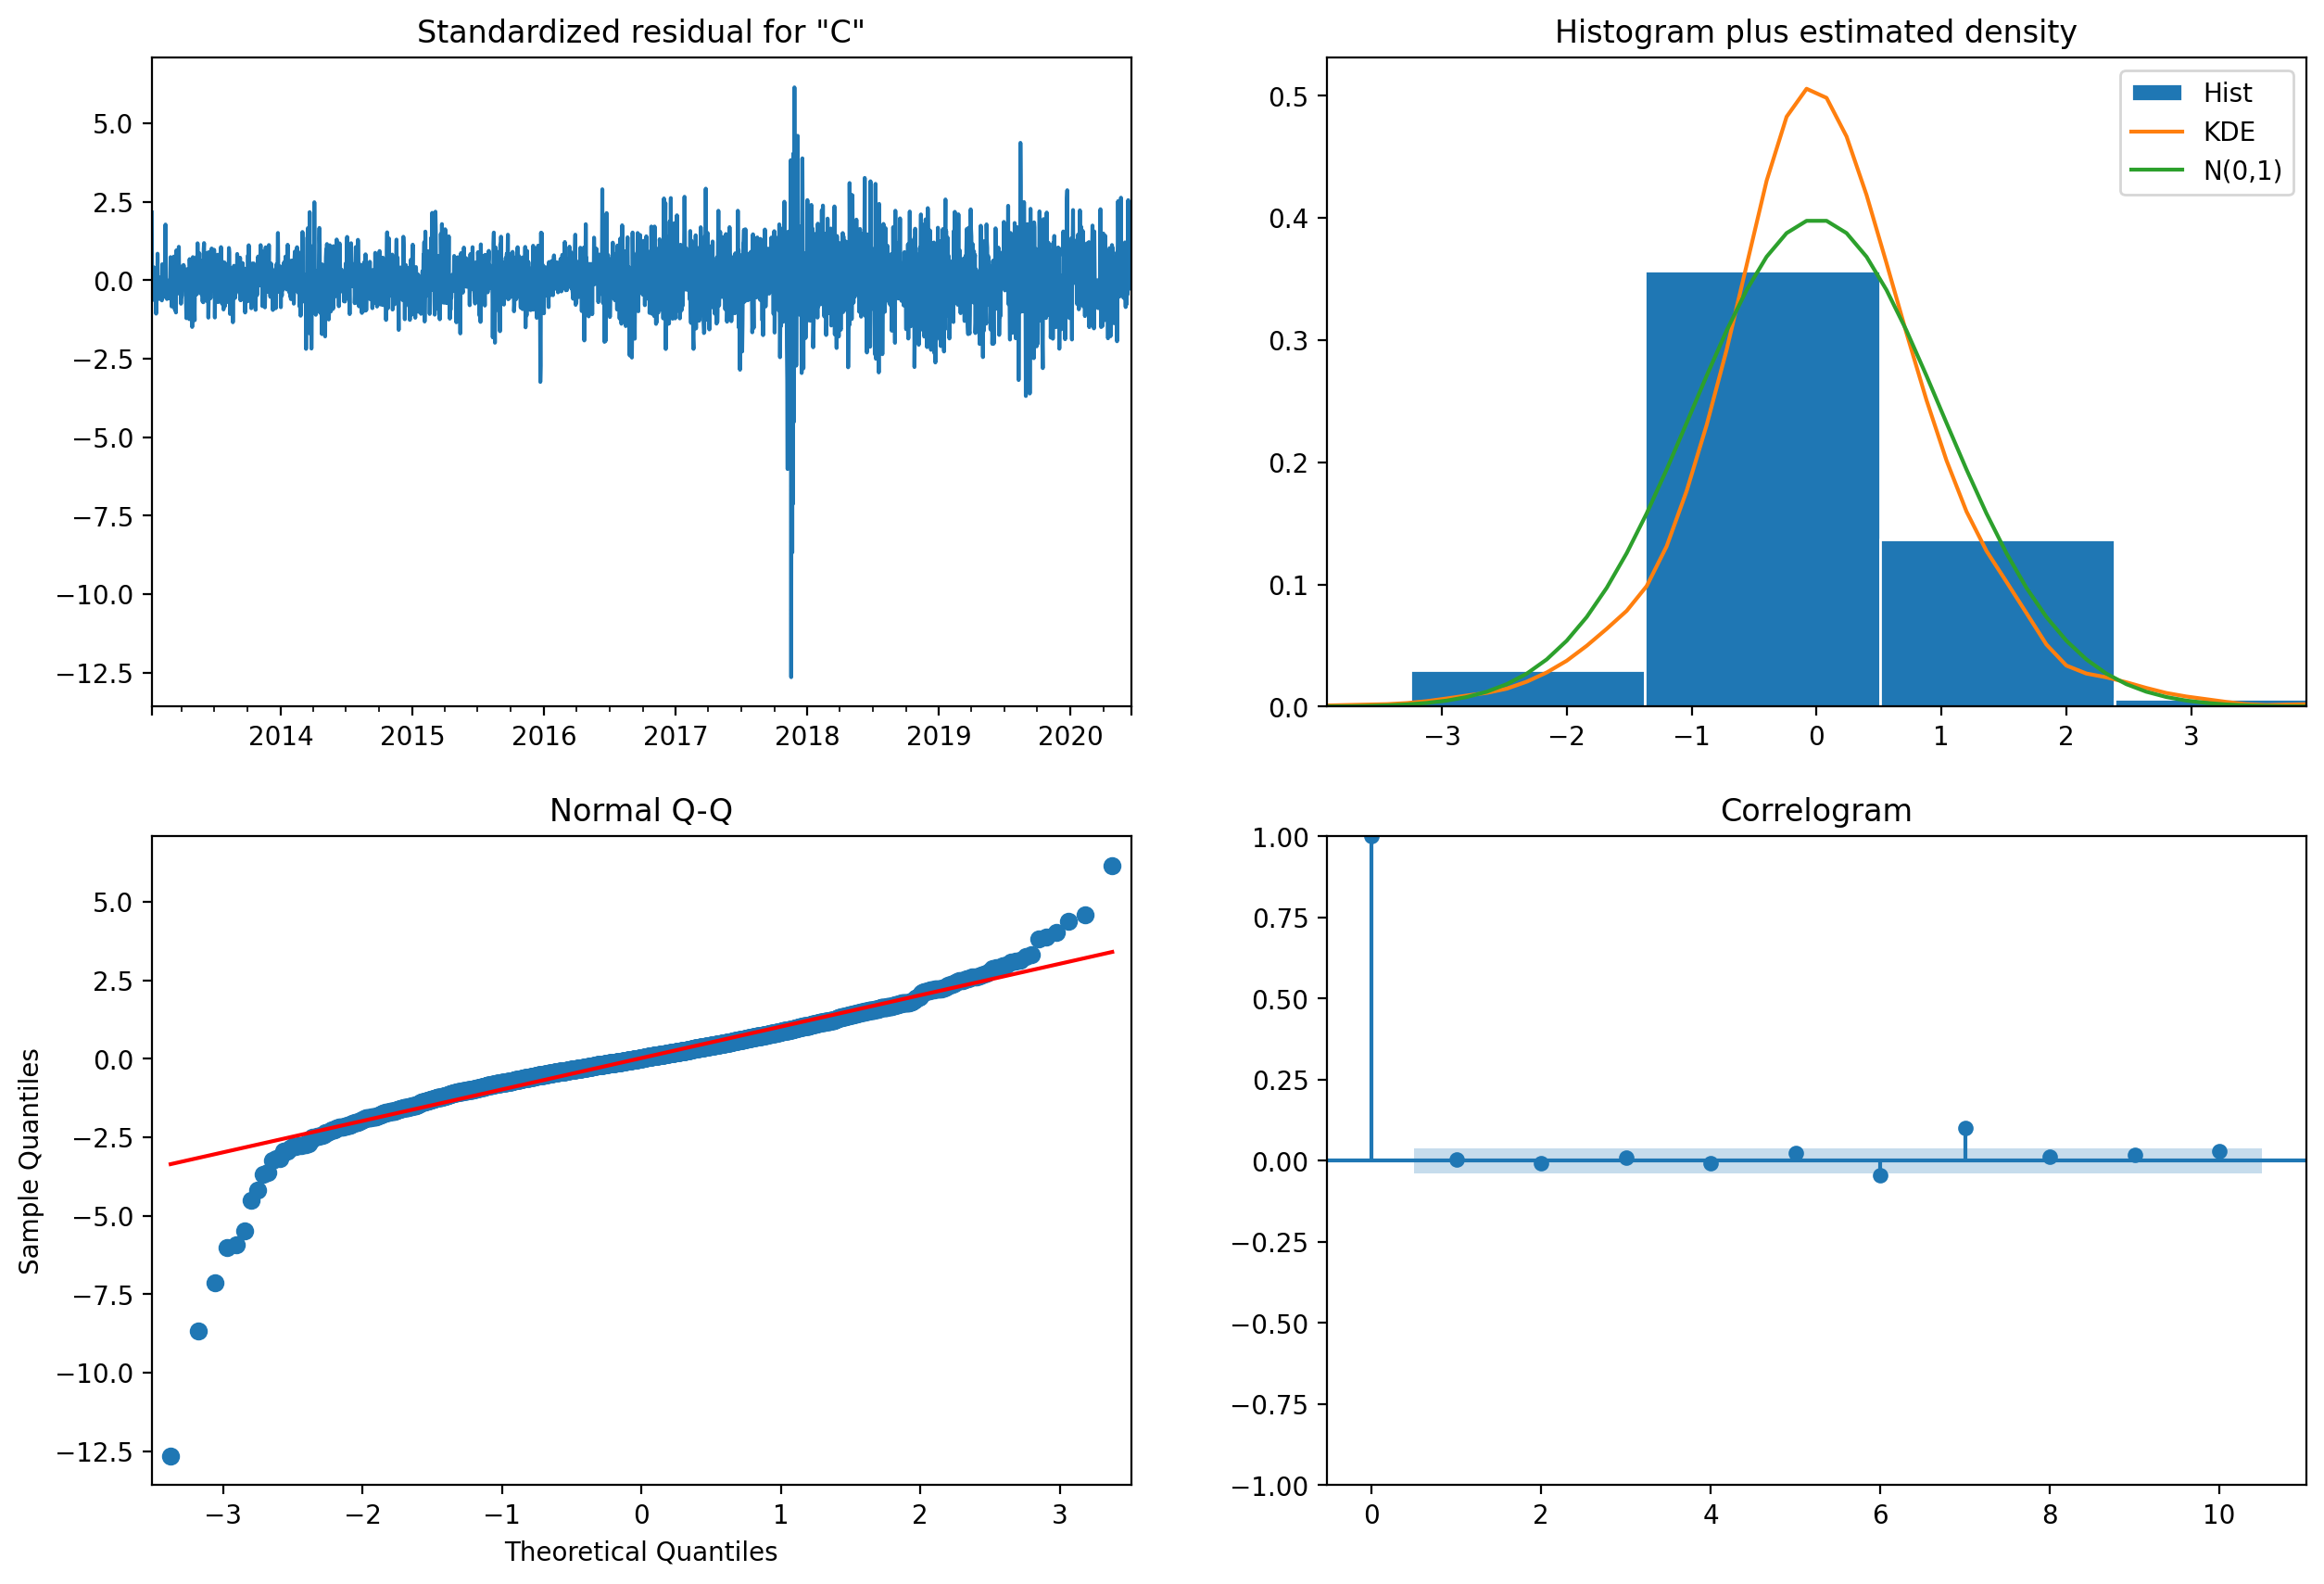

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "Volume" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'Volume'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['Volume']],  # Adiciona a variável exógena 'Volume'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['Volume']])[0]  # Inclui 'Volume' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()


In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2104.3159 MAE: 1646.2684 MAPE: 1.46 MSE: 4428145.3646 R2: 0.9294


In [ ]:
# Converter as listas de métricas e desvios padrão em DataFrame do pandas
metrics_df = pd.DataFrame(errors)

file_path = f'/content/drive/MyDrive/Mestrado/Estatística/Metricas_exp_window_volume.csv'
errors['MAPE'] = errors['MAPE']*100

metrics_df.to_csv(file_path, index=False)

##U$D

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

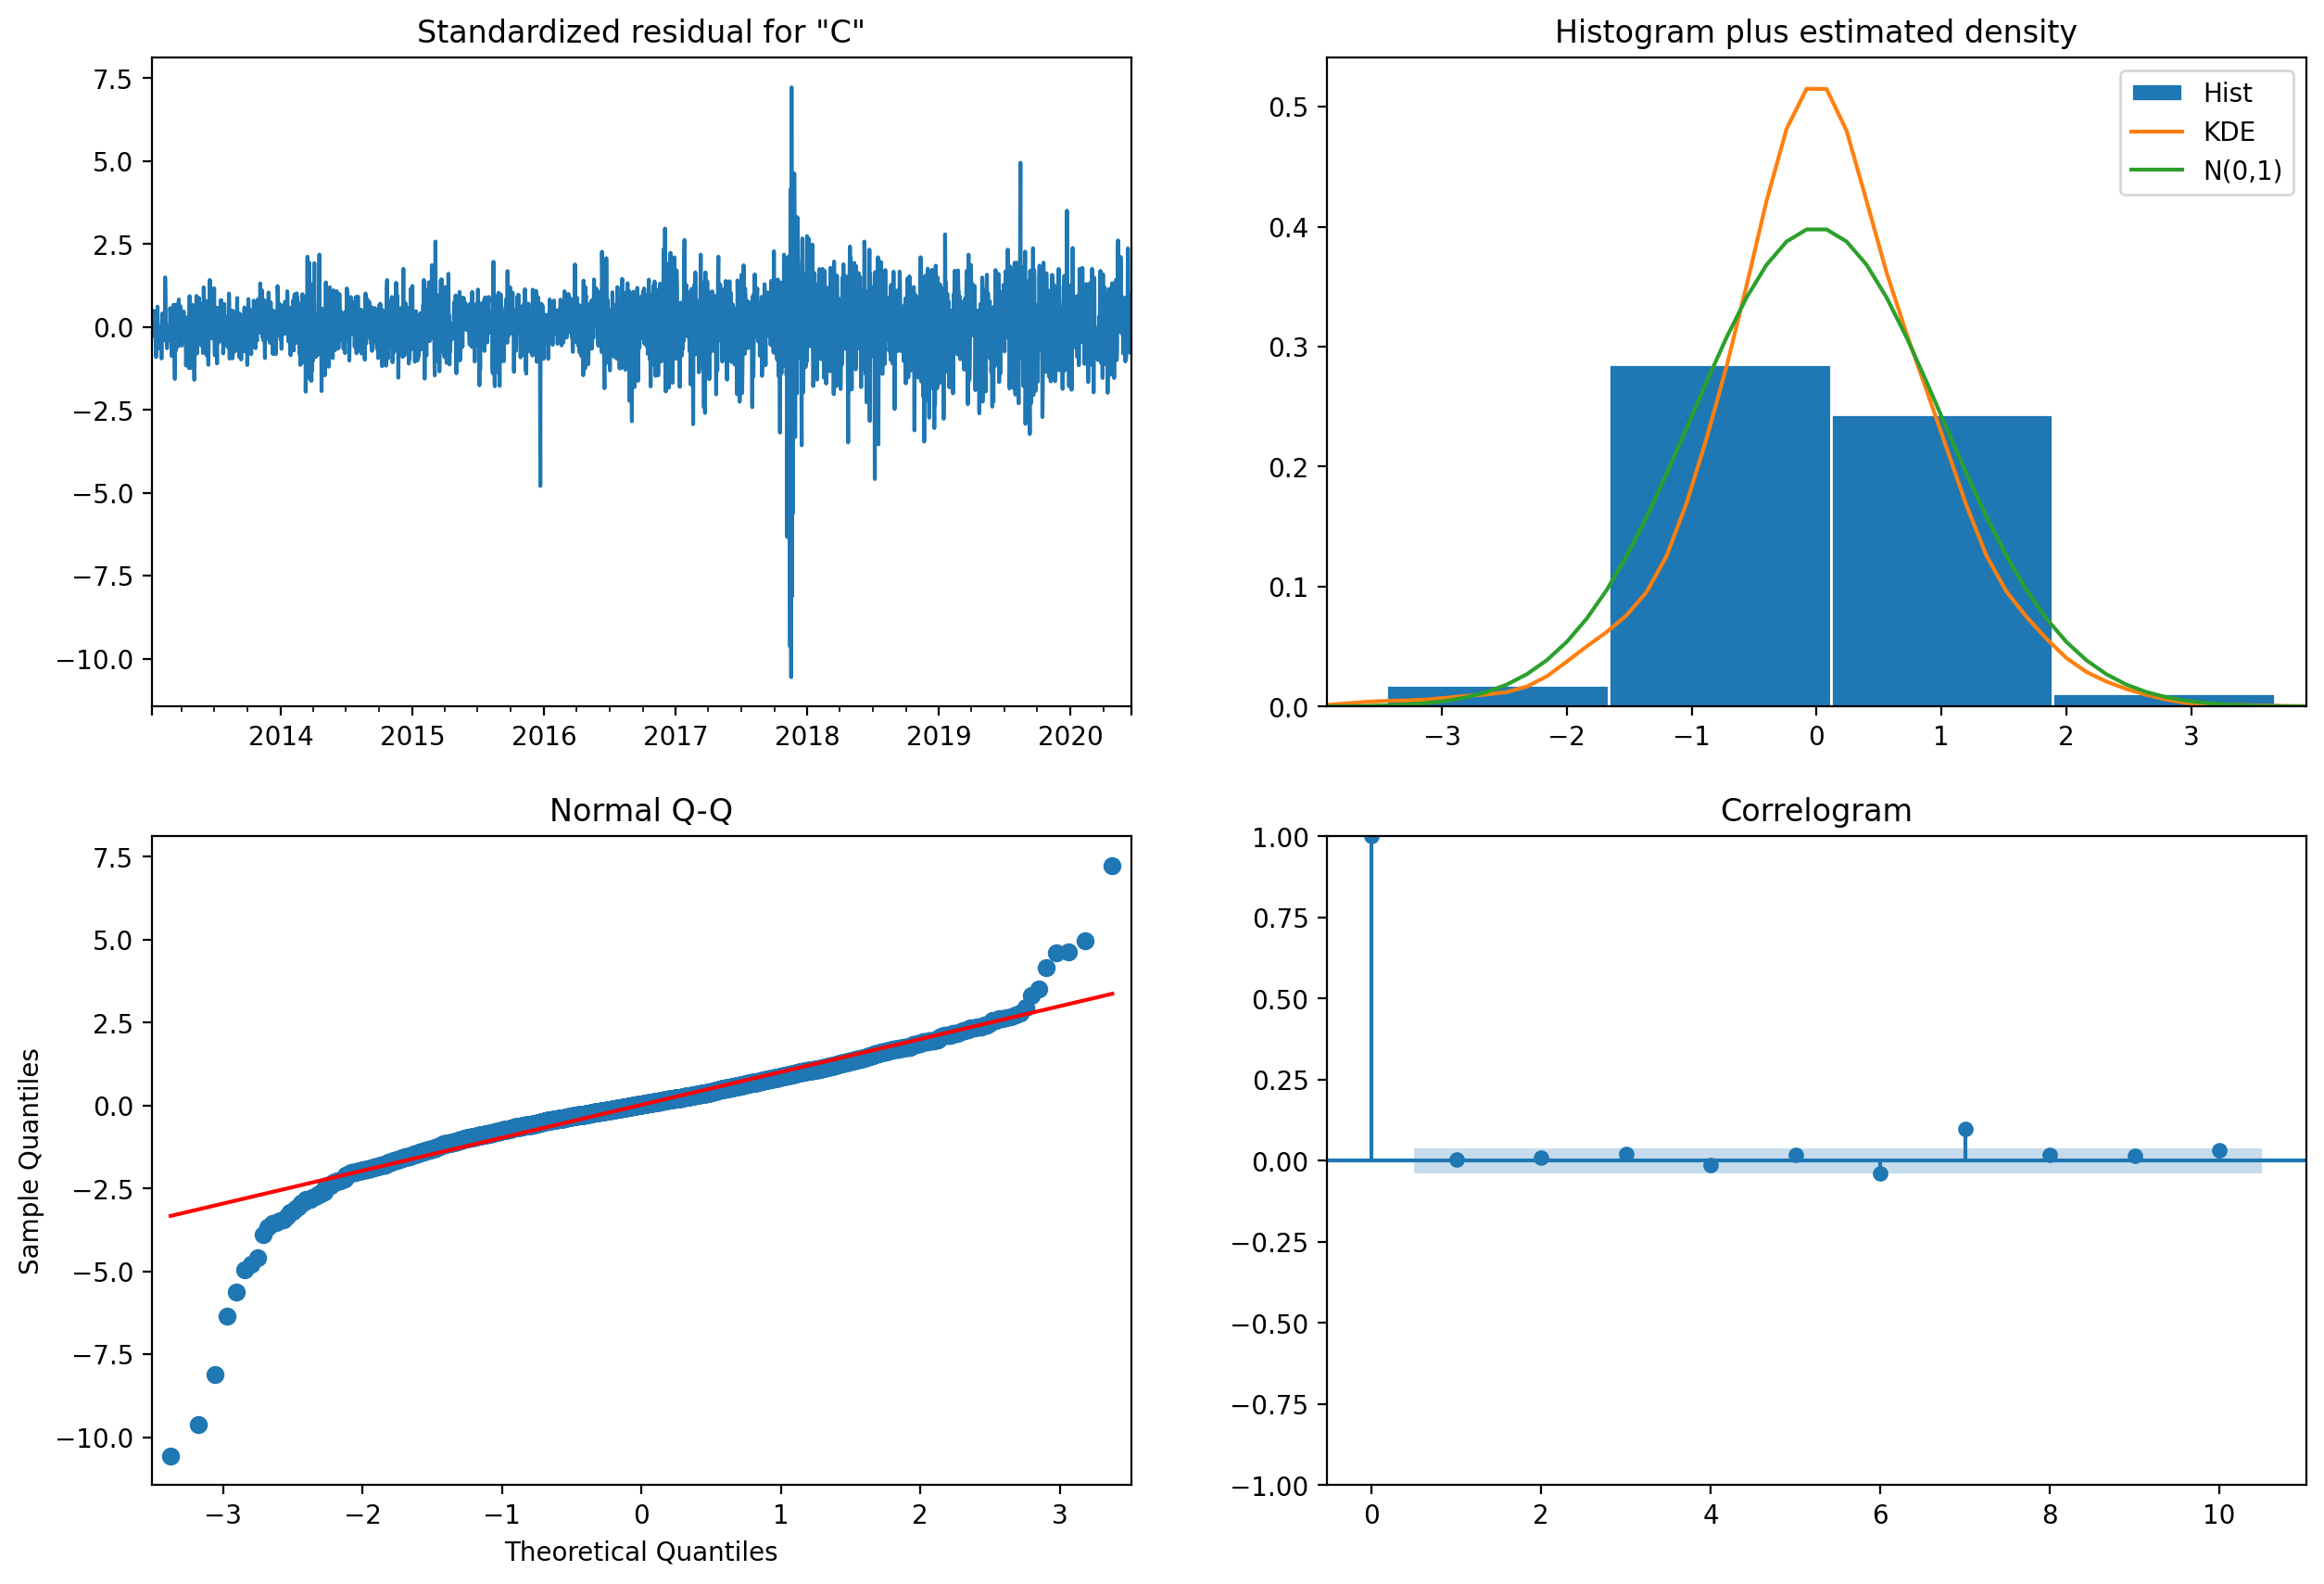

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "USD" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'USD'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['USD']],  # Adiciona a variável exógena 'USD'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['USD']])[0]  # Inclui 'USD' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()


In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 1370.9158 MAE: 1085.8787 MAPE: 0.97 MSE: 1879410.0359 R2: 0.97


## High + Low

In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

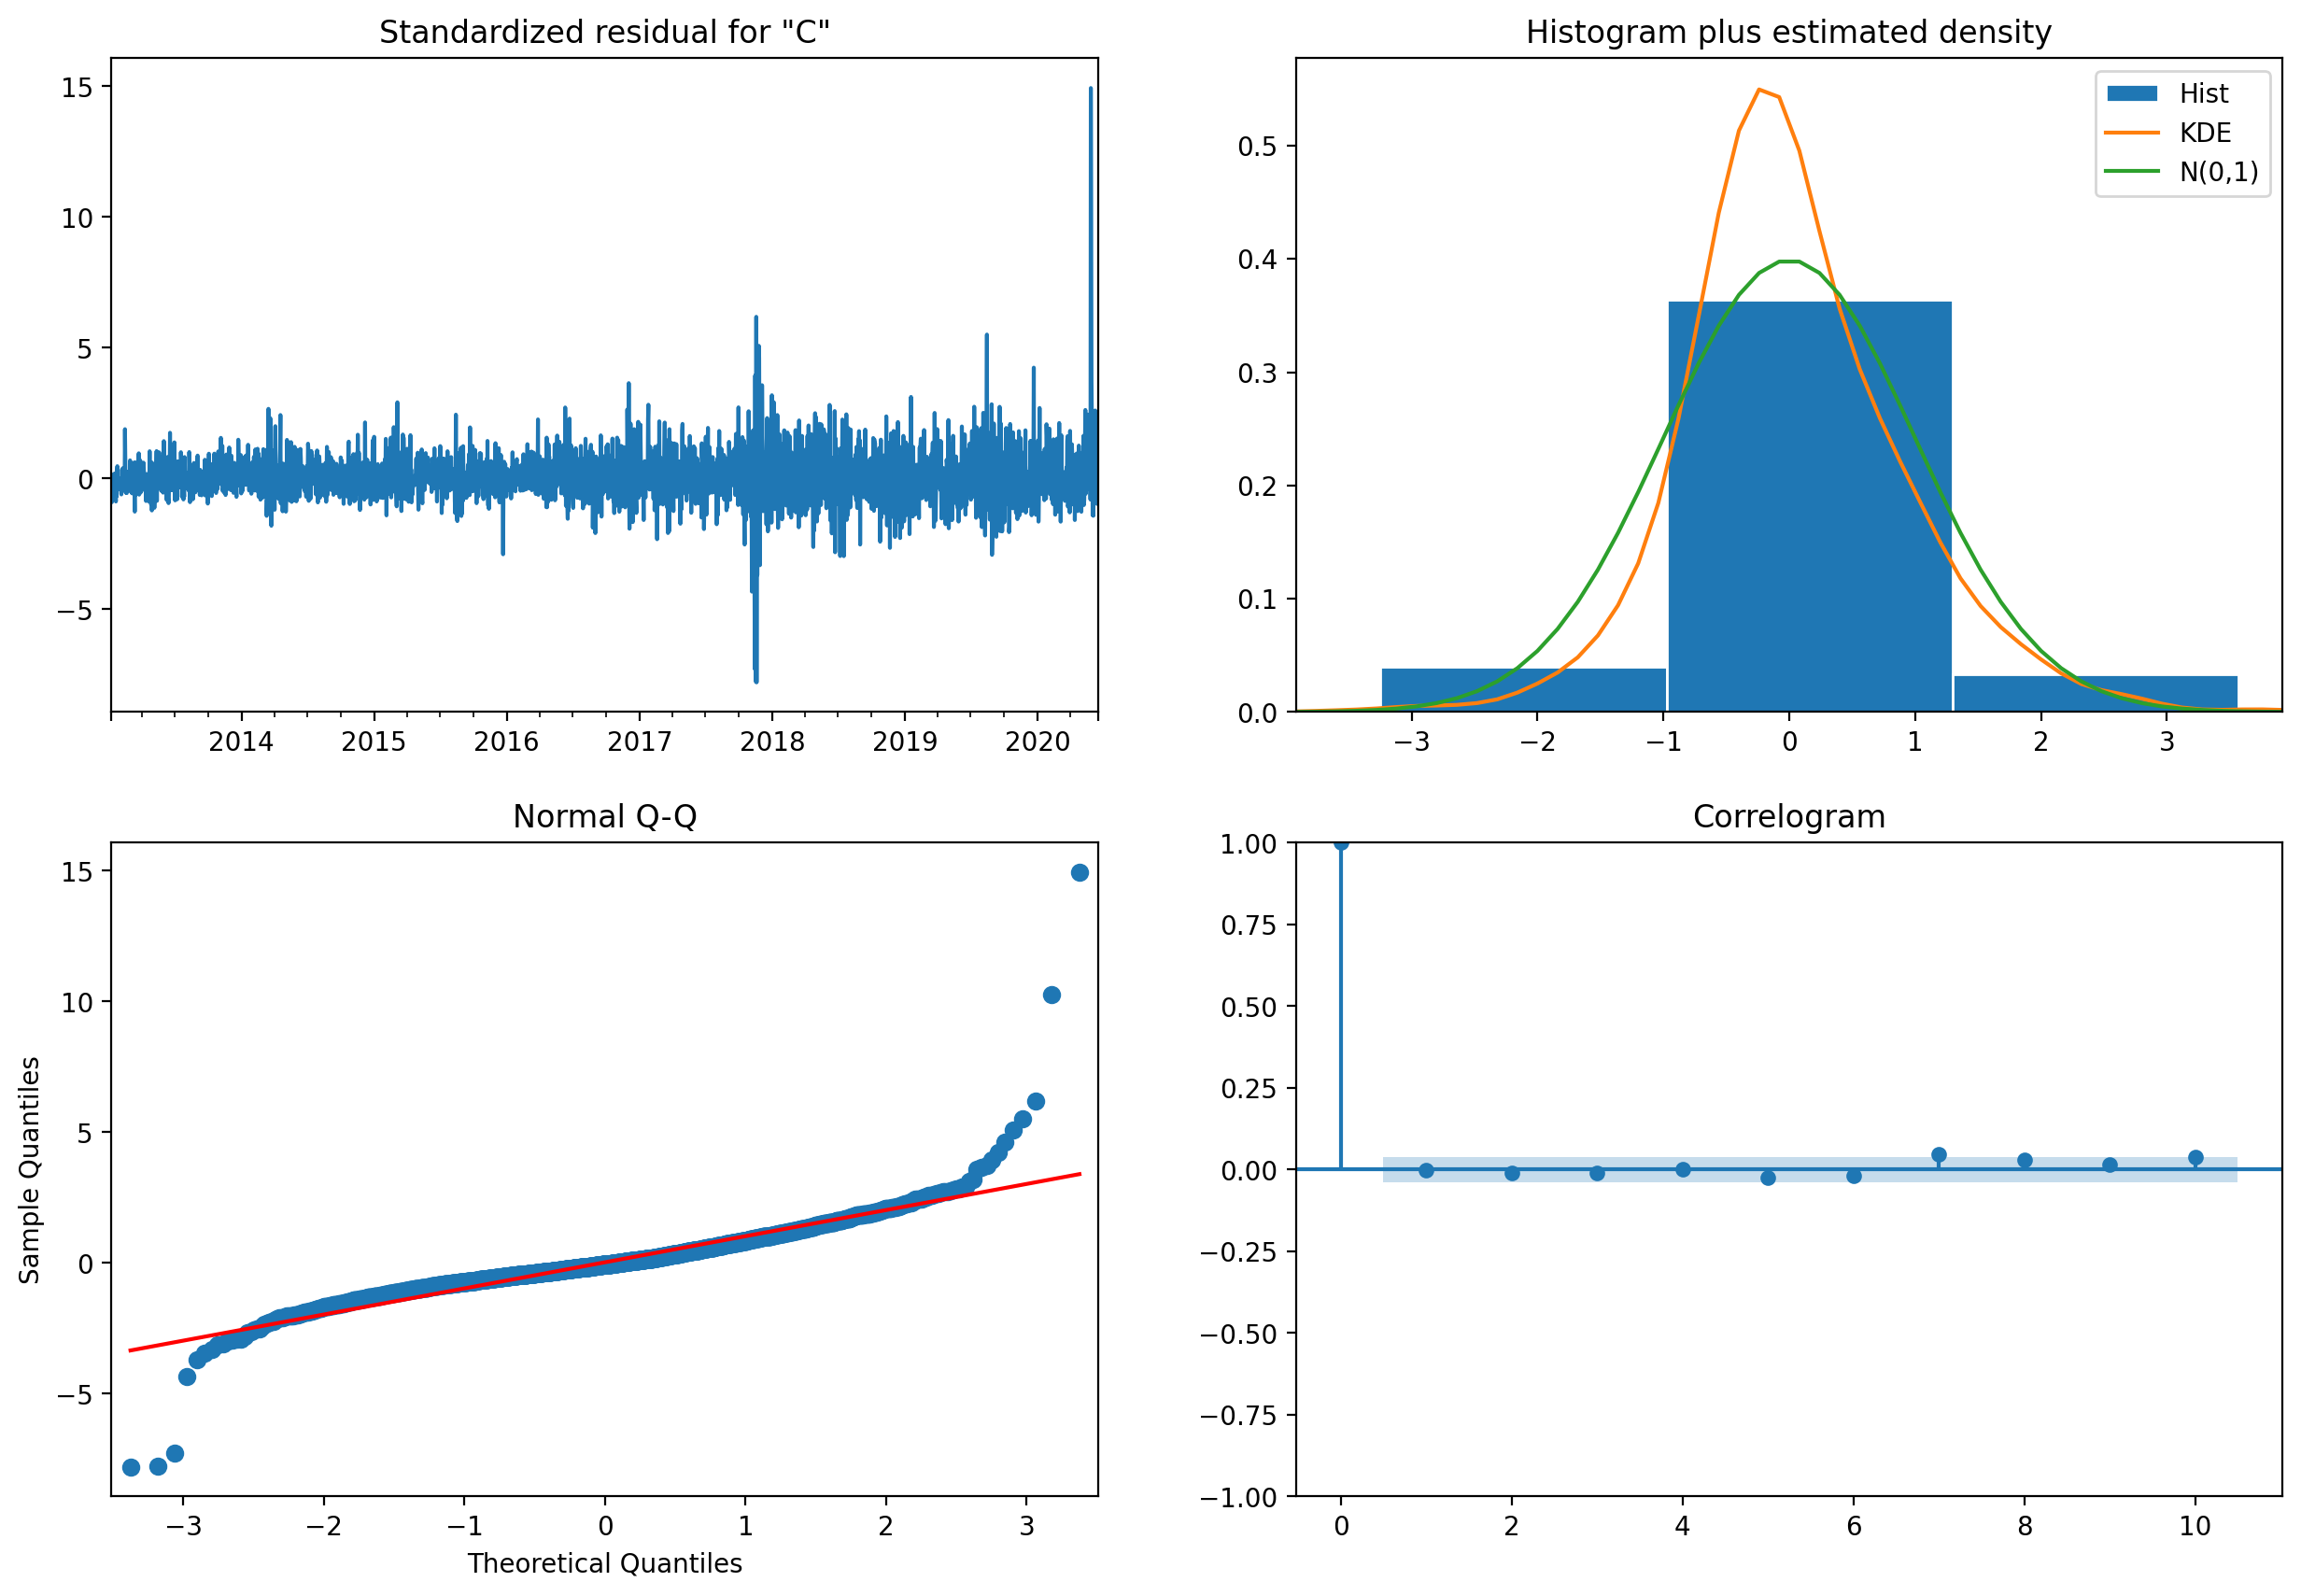

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['High', 'Low']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['High', 'Low']])[0]  # Verificar esse trecho.
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2674.6539 MAE: 711.8704 MAPE: 0.62 MSE: 7153773.5637 R2: 0.8859


##High + **Volume**

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

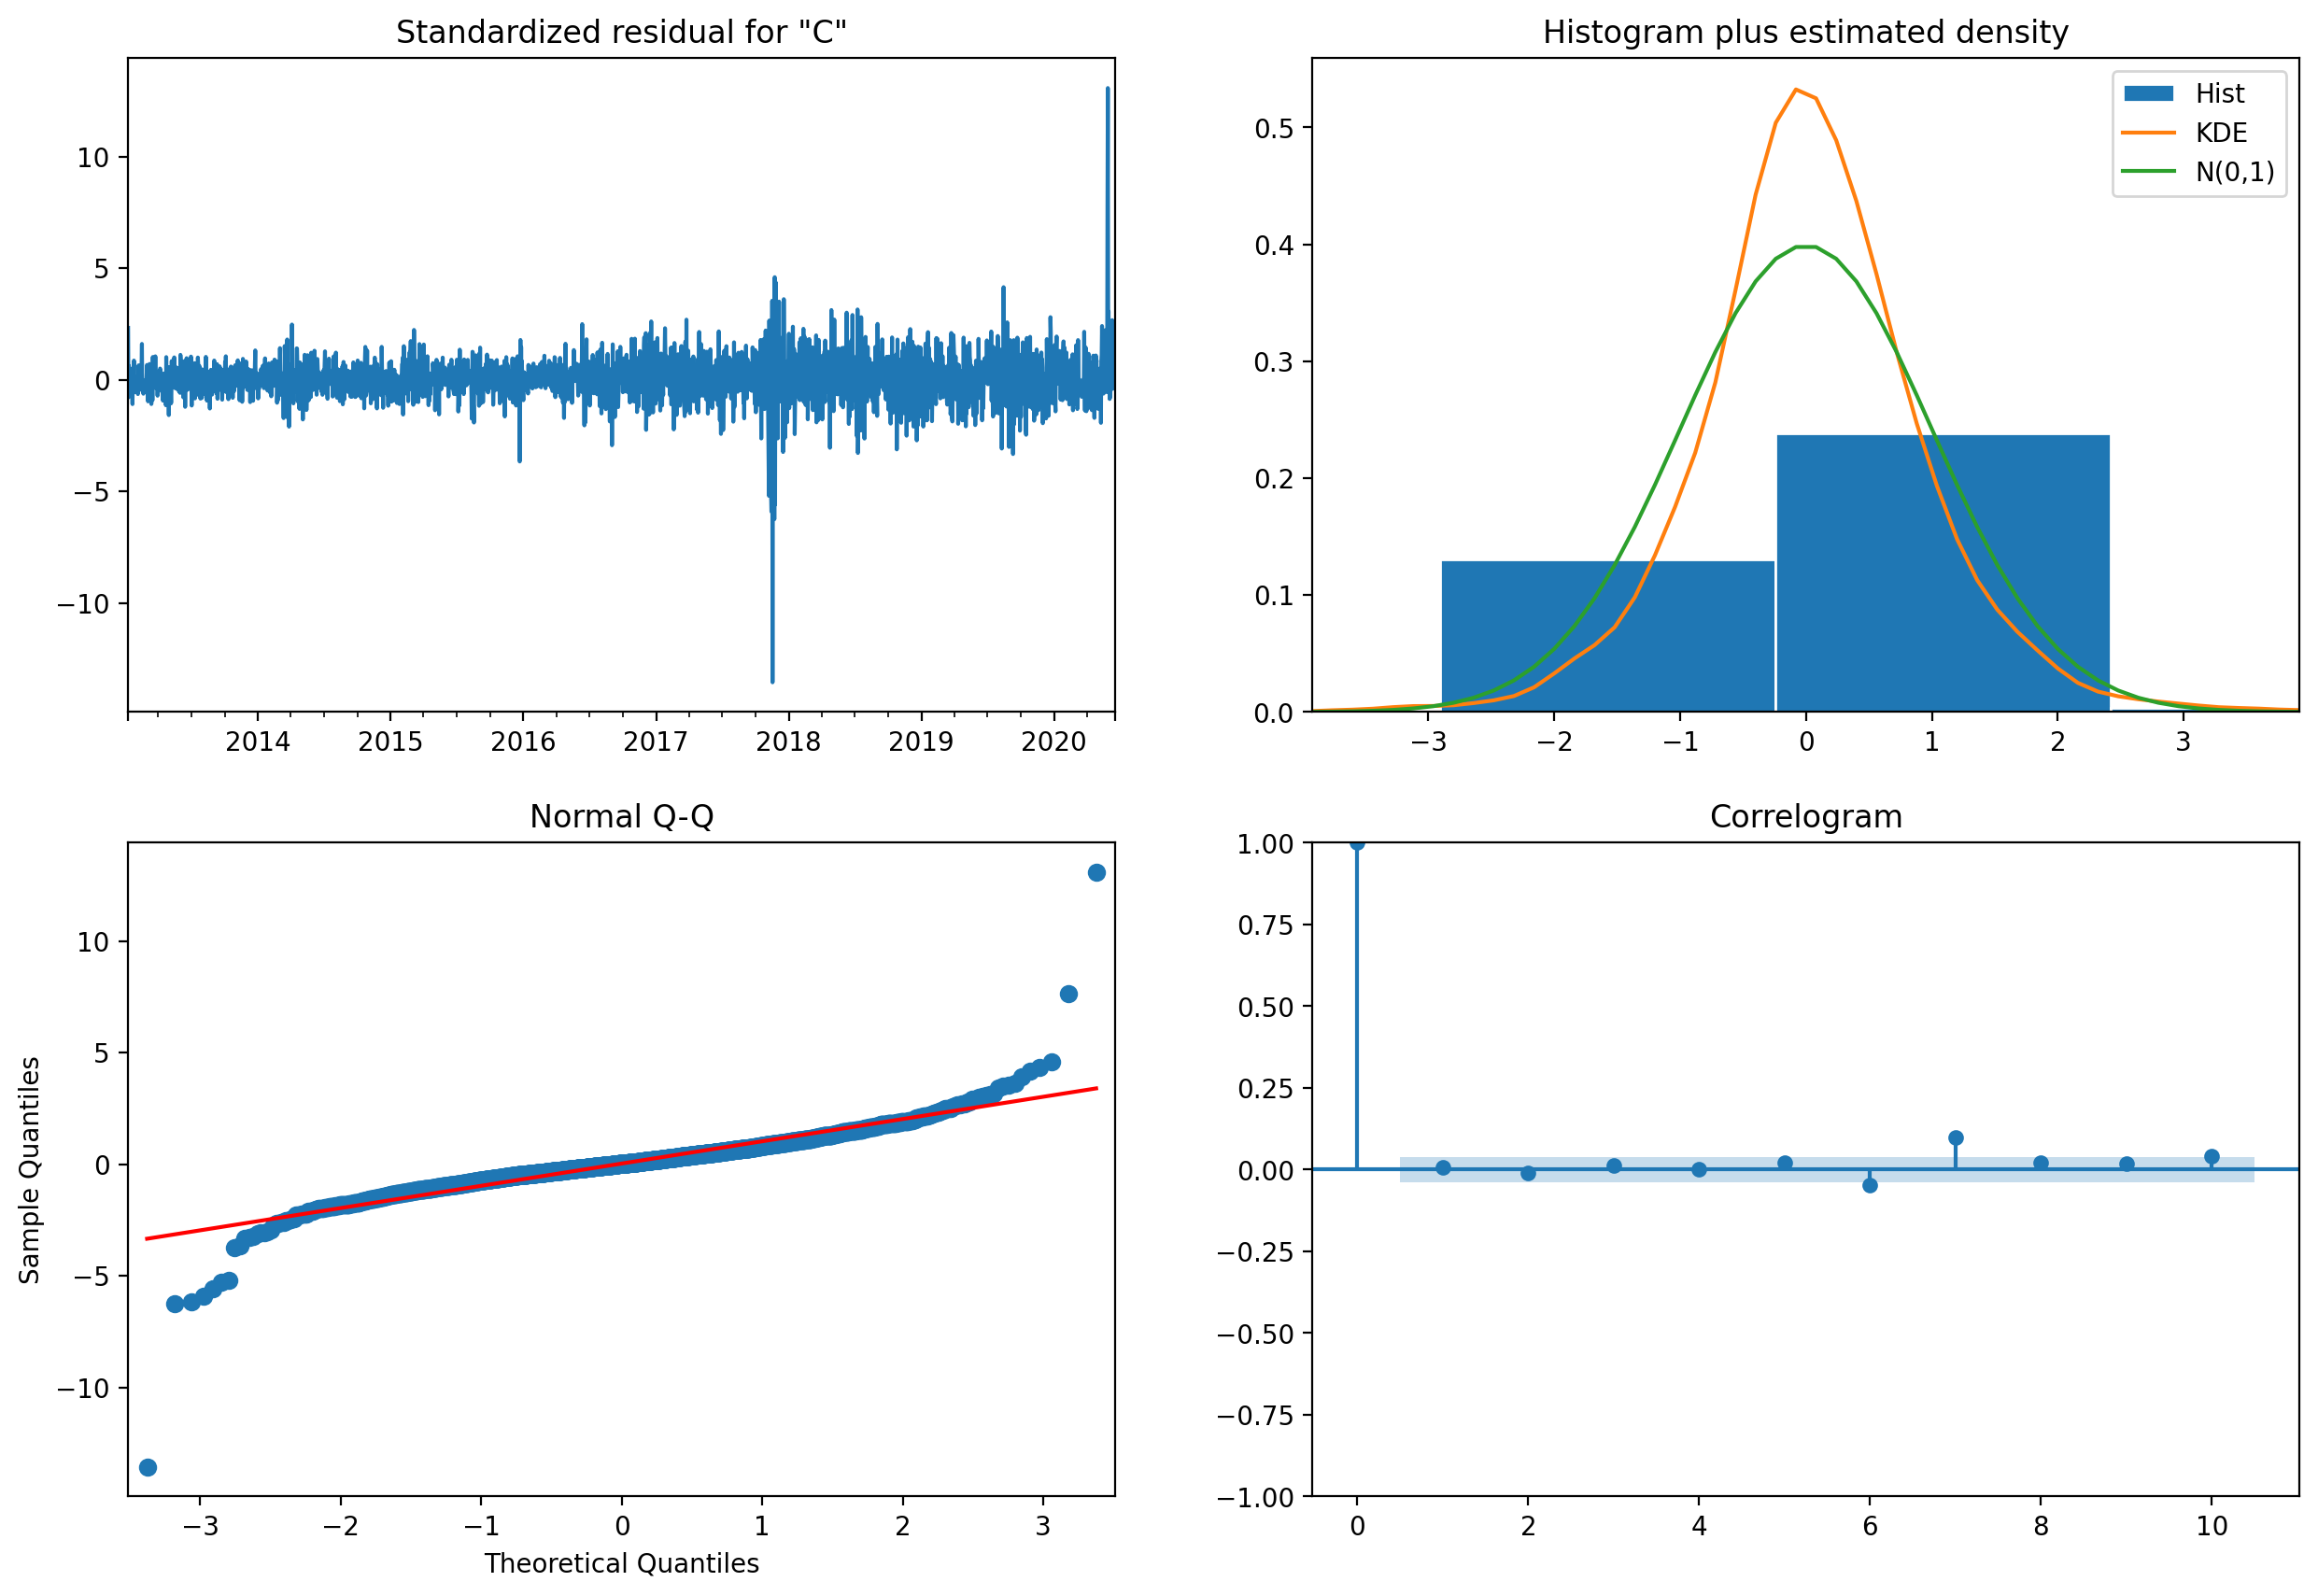

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['High', 'Volume']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['High', 'Volume']])[0]  # Inclui 'High' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2350.8892 MAE: 948.0421 MAPE: 0.83 MSE: 5526679.8254 R2: 0.9118


##High+U$D

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

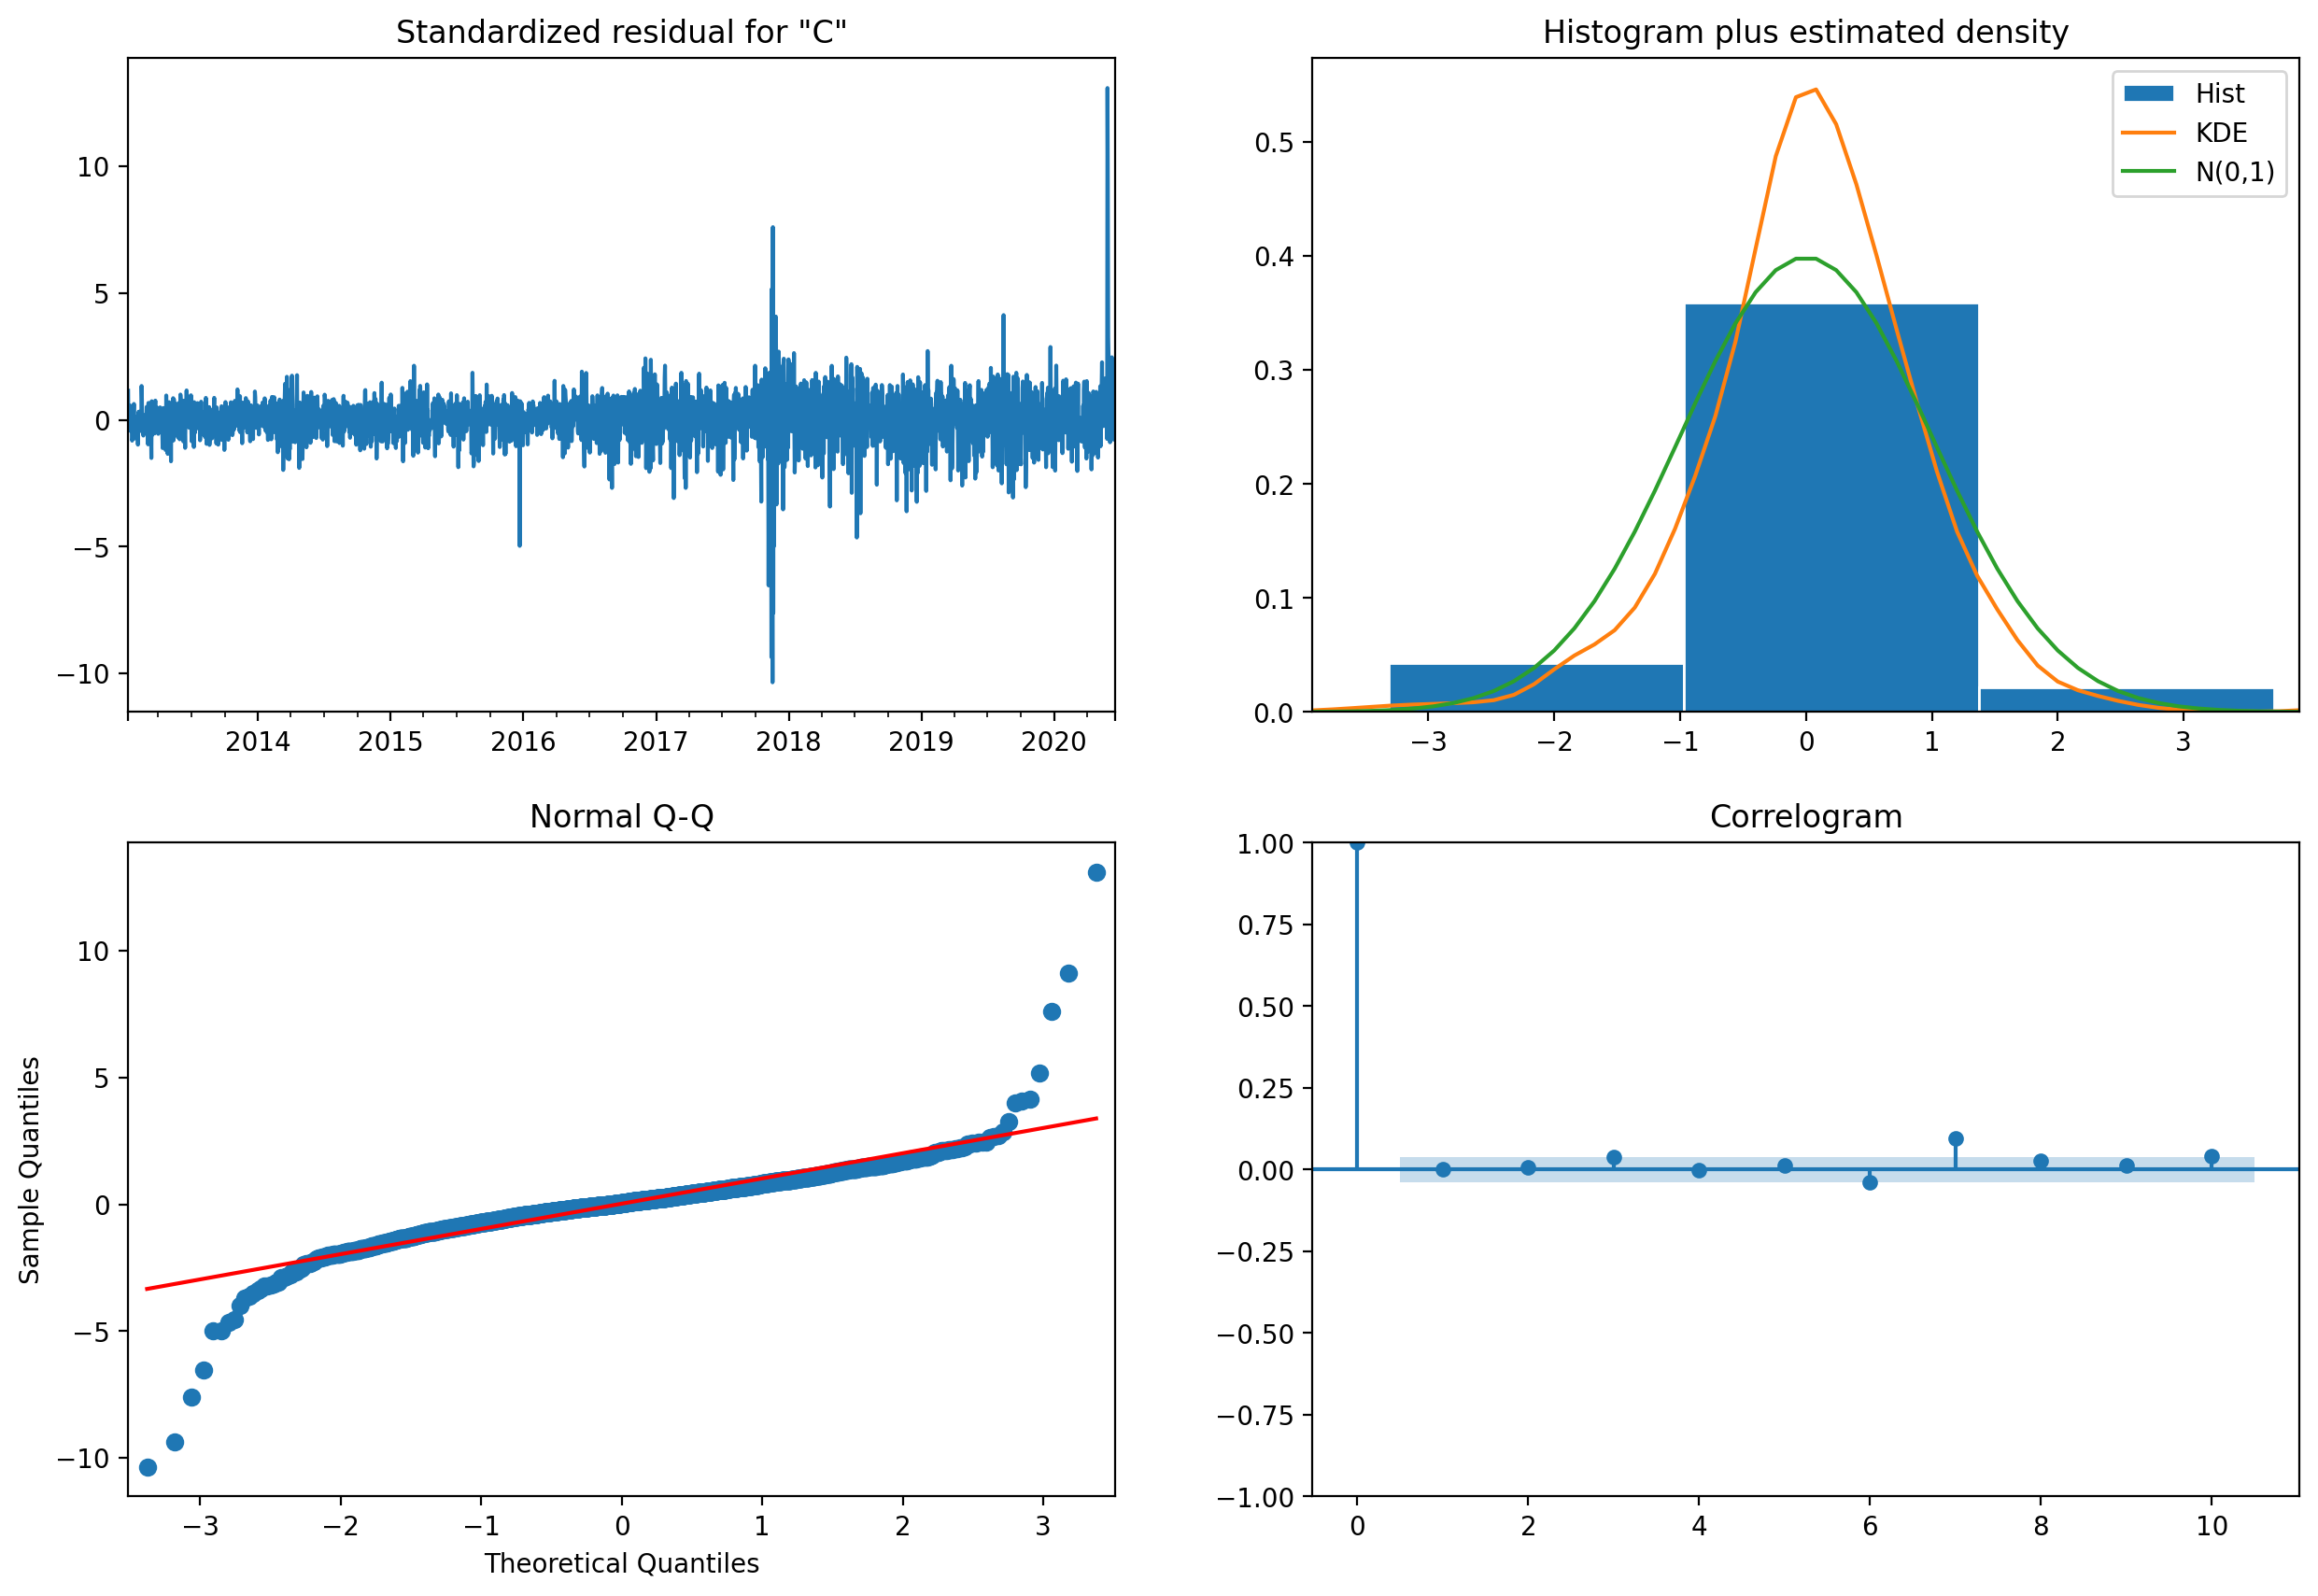

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['High', 'USD']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['High', 'USD']])[0]  # Inclui 'High' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2843.0779 MAE: 821.3919 MAPE: 0.72 MSE: 8083091.7386 R2: 0.8711


##Low+Volume

In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

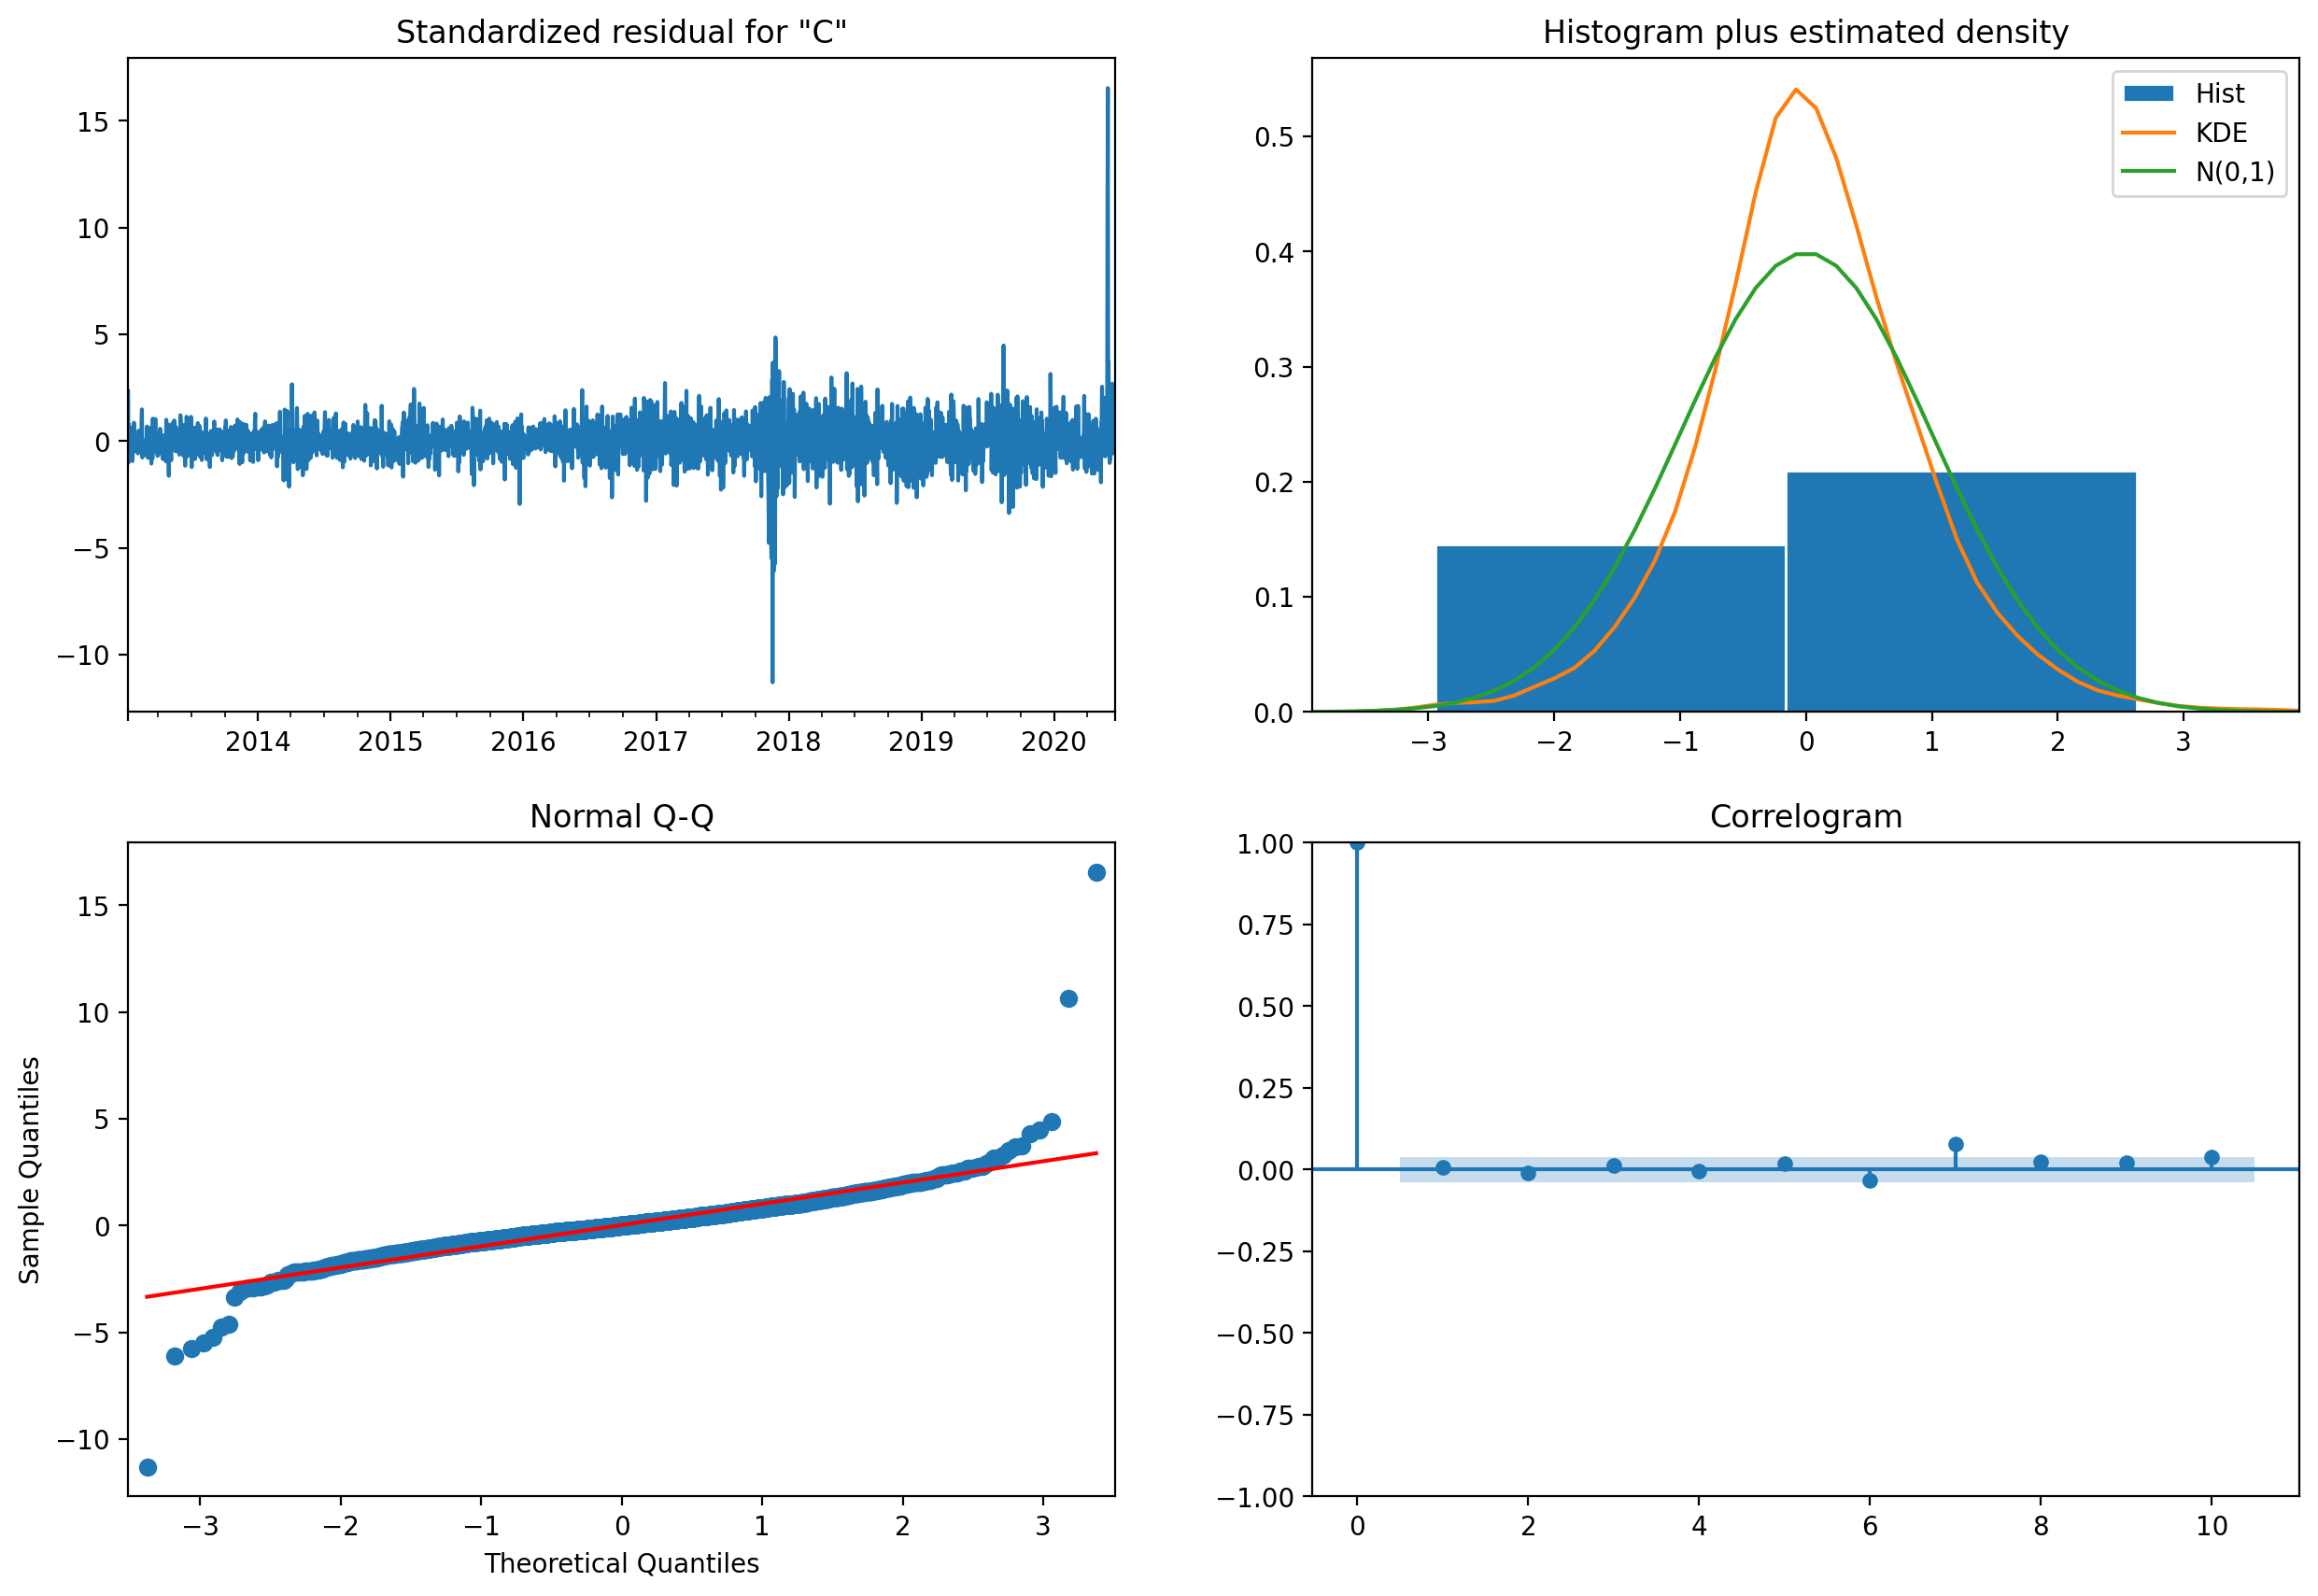

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['Low', 'Volume']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['Low', 'Volume']])[0]  # Inclui 'High' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 3040.7699 MAE: 822.0317 MAPE: 0.7100000000000001 MSE: 9246281.4111 R2: 0.8525


##Low + U$D

In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

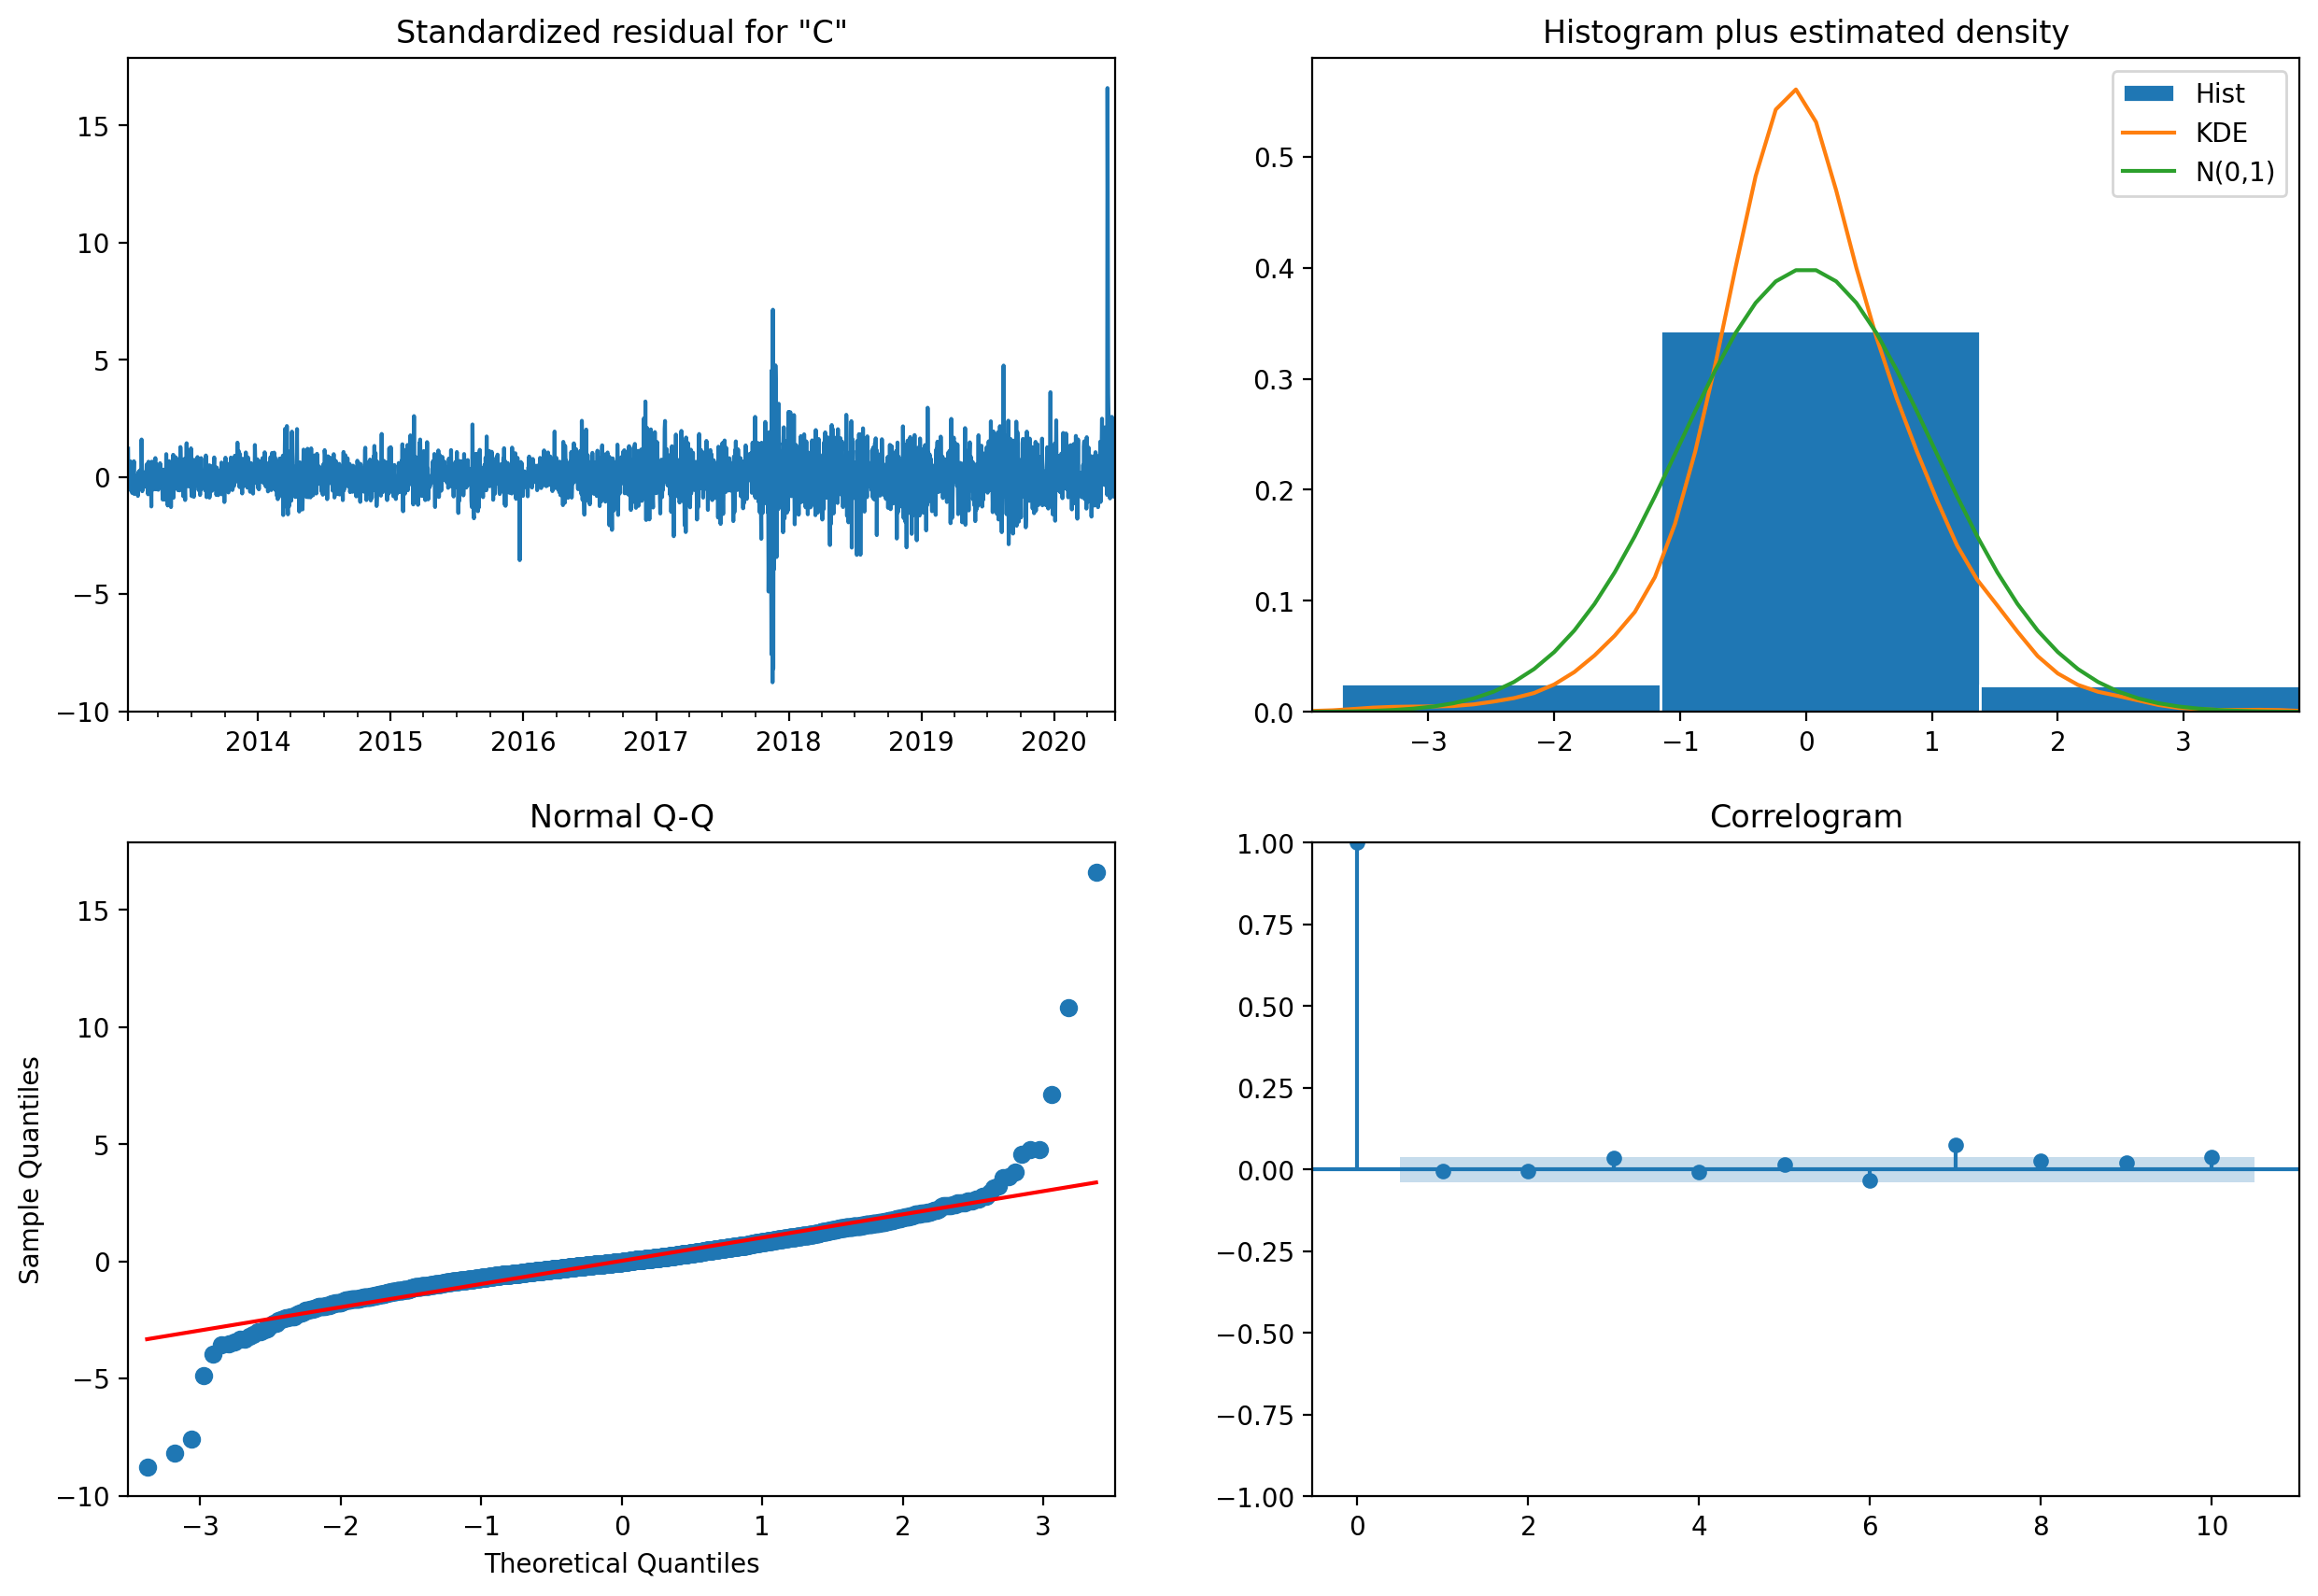

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['Low', 'USD']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['Low', 'USD']])[0]  # Inclui 'High' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2671.0004 MAE: 779.1461 MAPE: 0.6799999999999999 MSE: 7134243.0179 R2: 0.8862


##Volume + U$D

In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

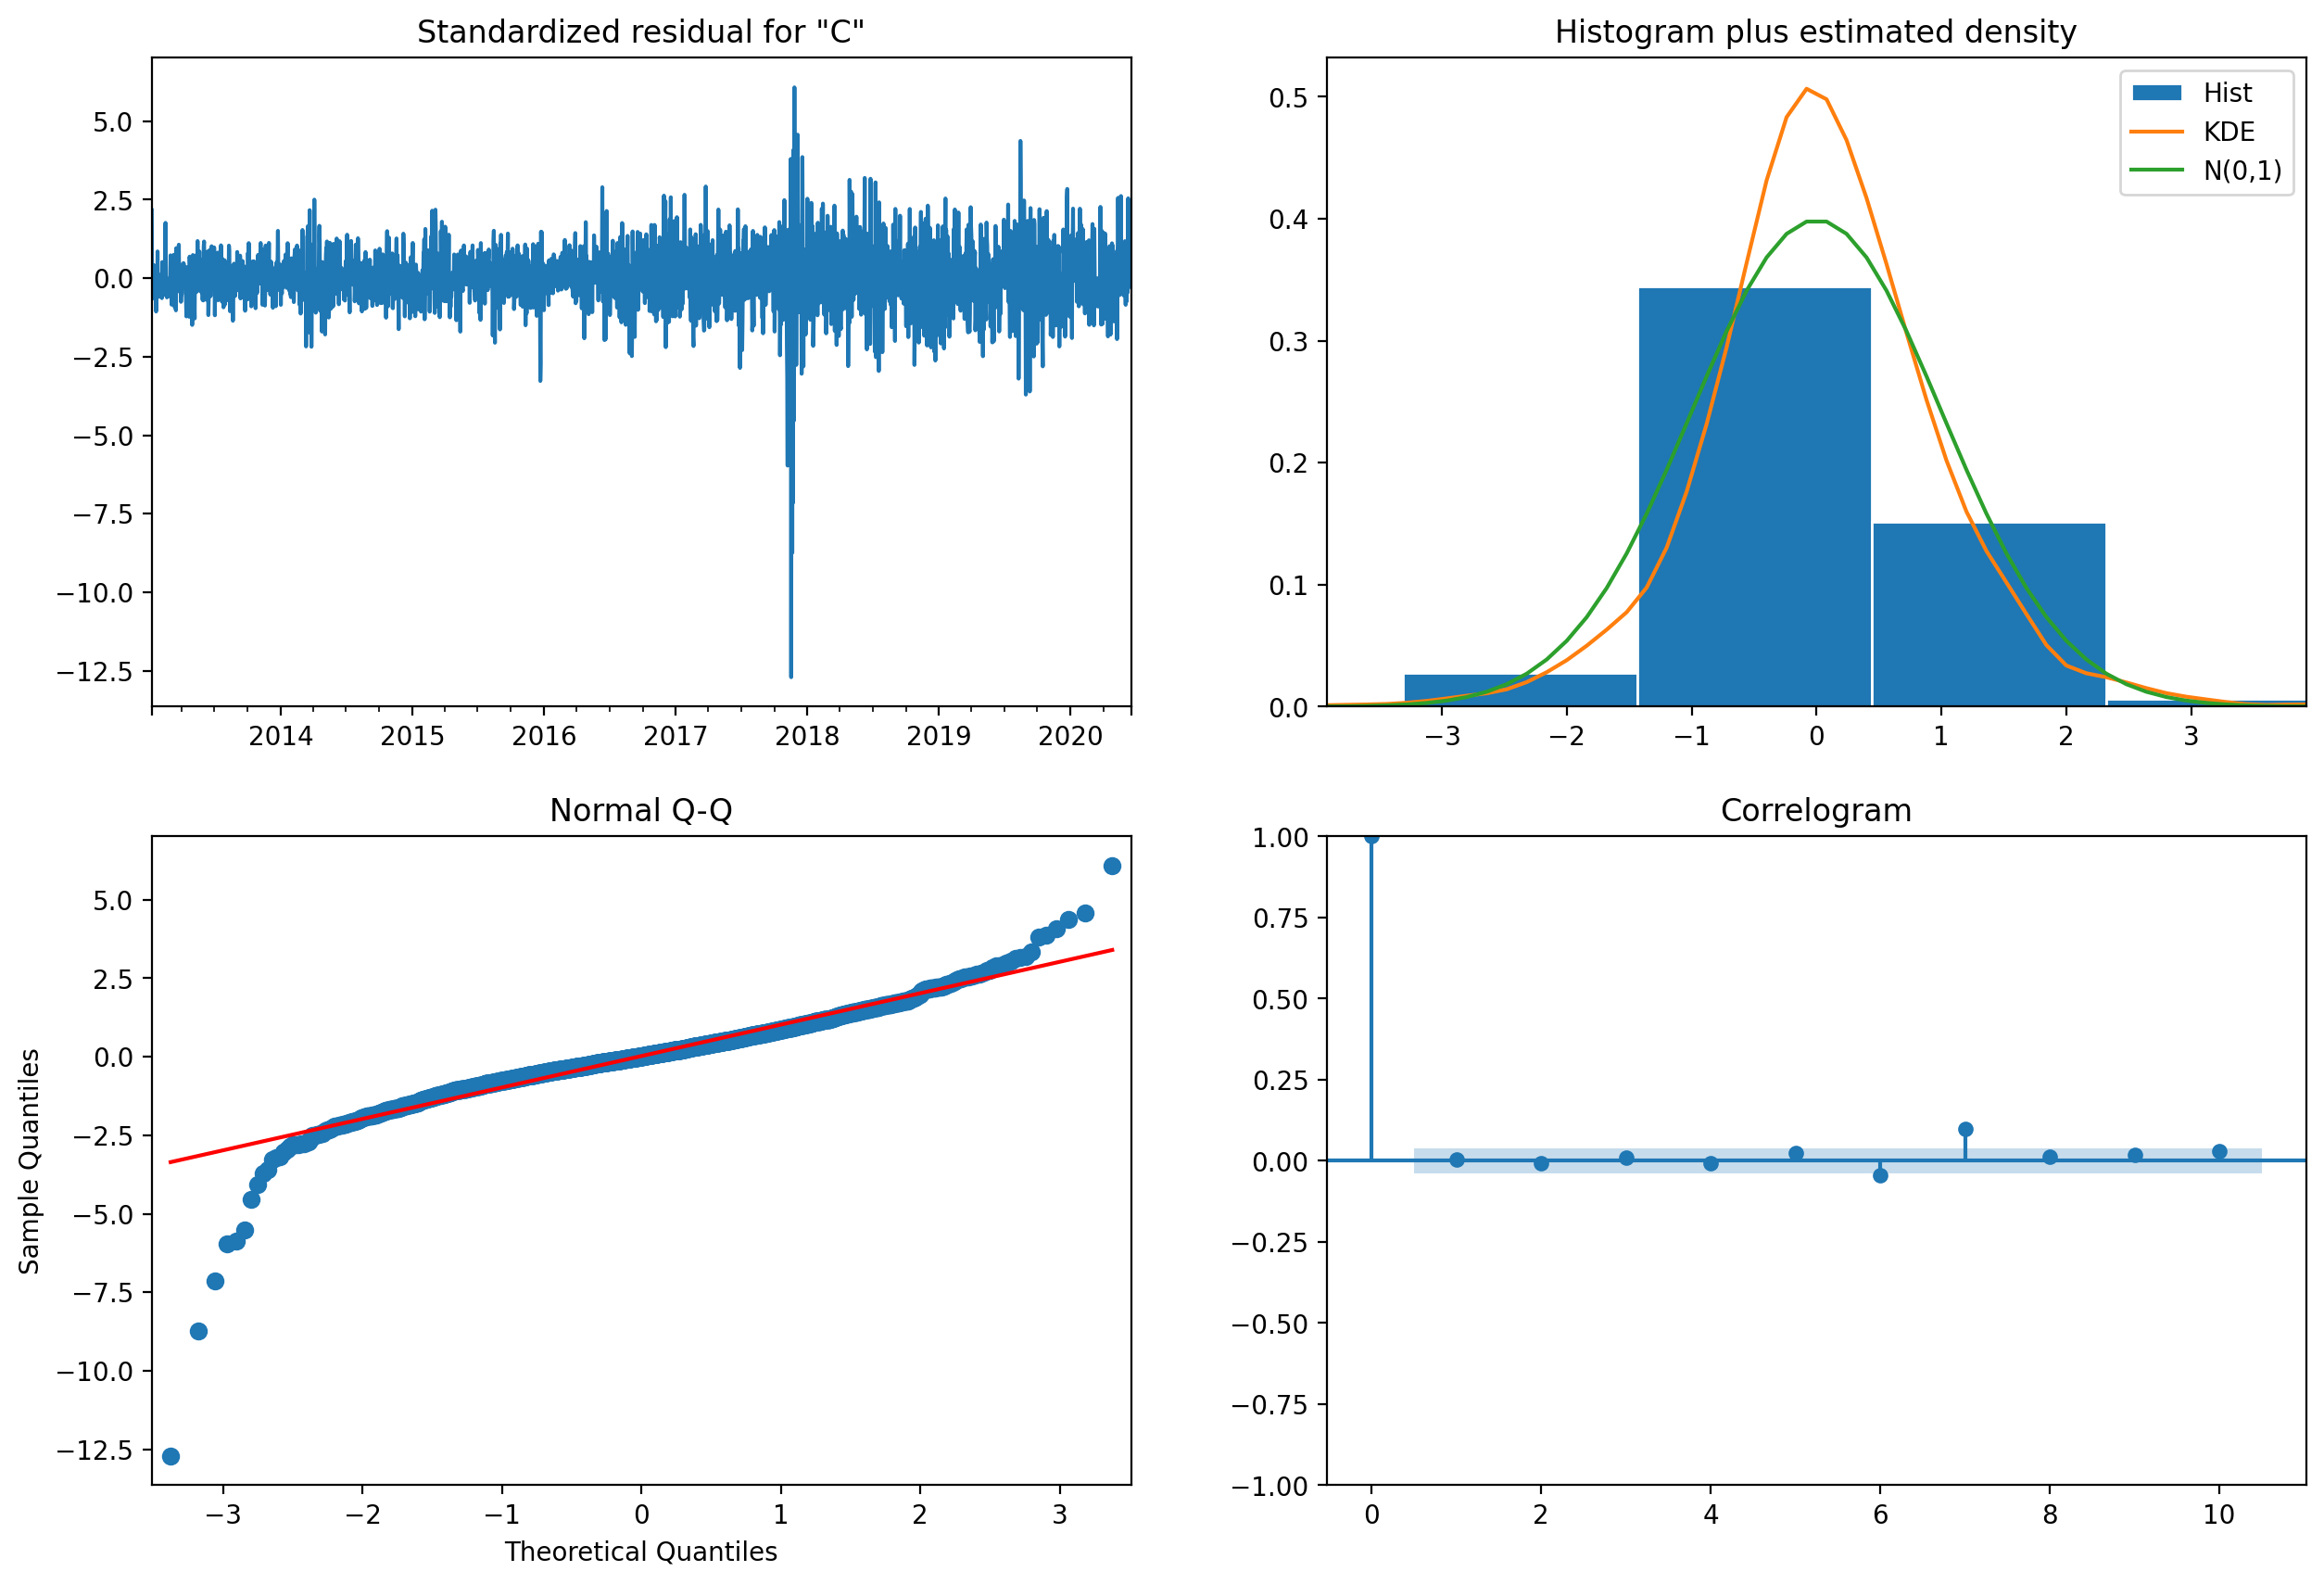

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['Volume', 'USD']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['Volume', 'USD']])[0]  # Inclui 'High' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2090.3894 MAE: 1641.8908 MAPE: 1.46 MSE: 4369727.7907 R2: 0.9303


##High`+ Low `+ U$D

In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

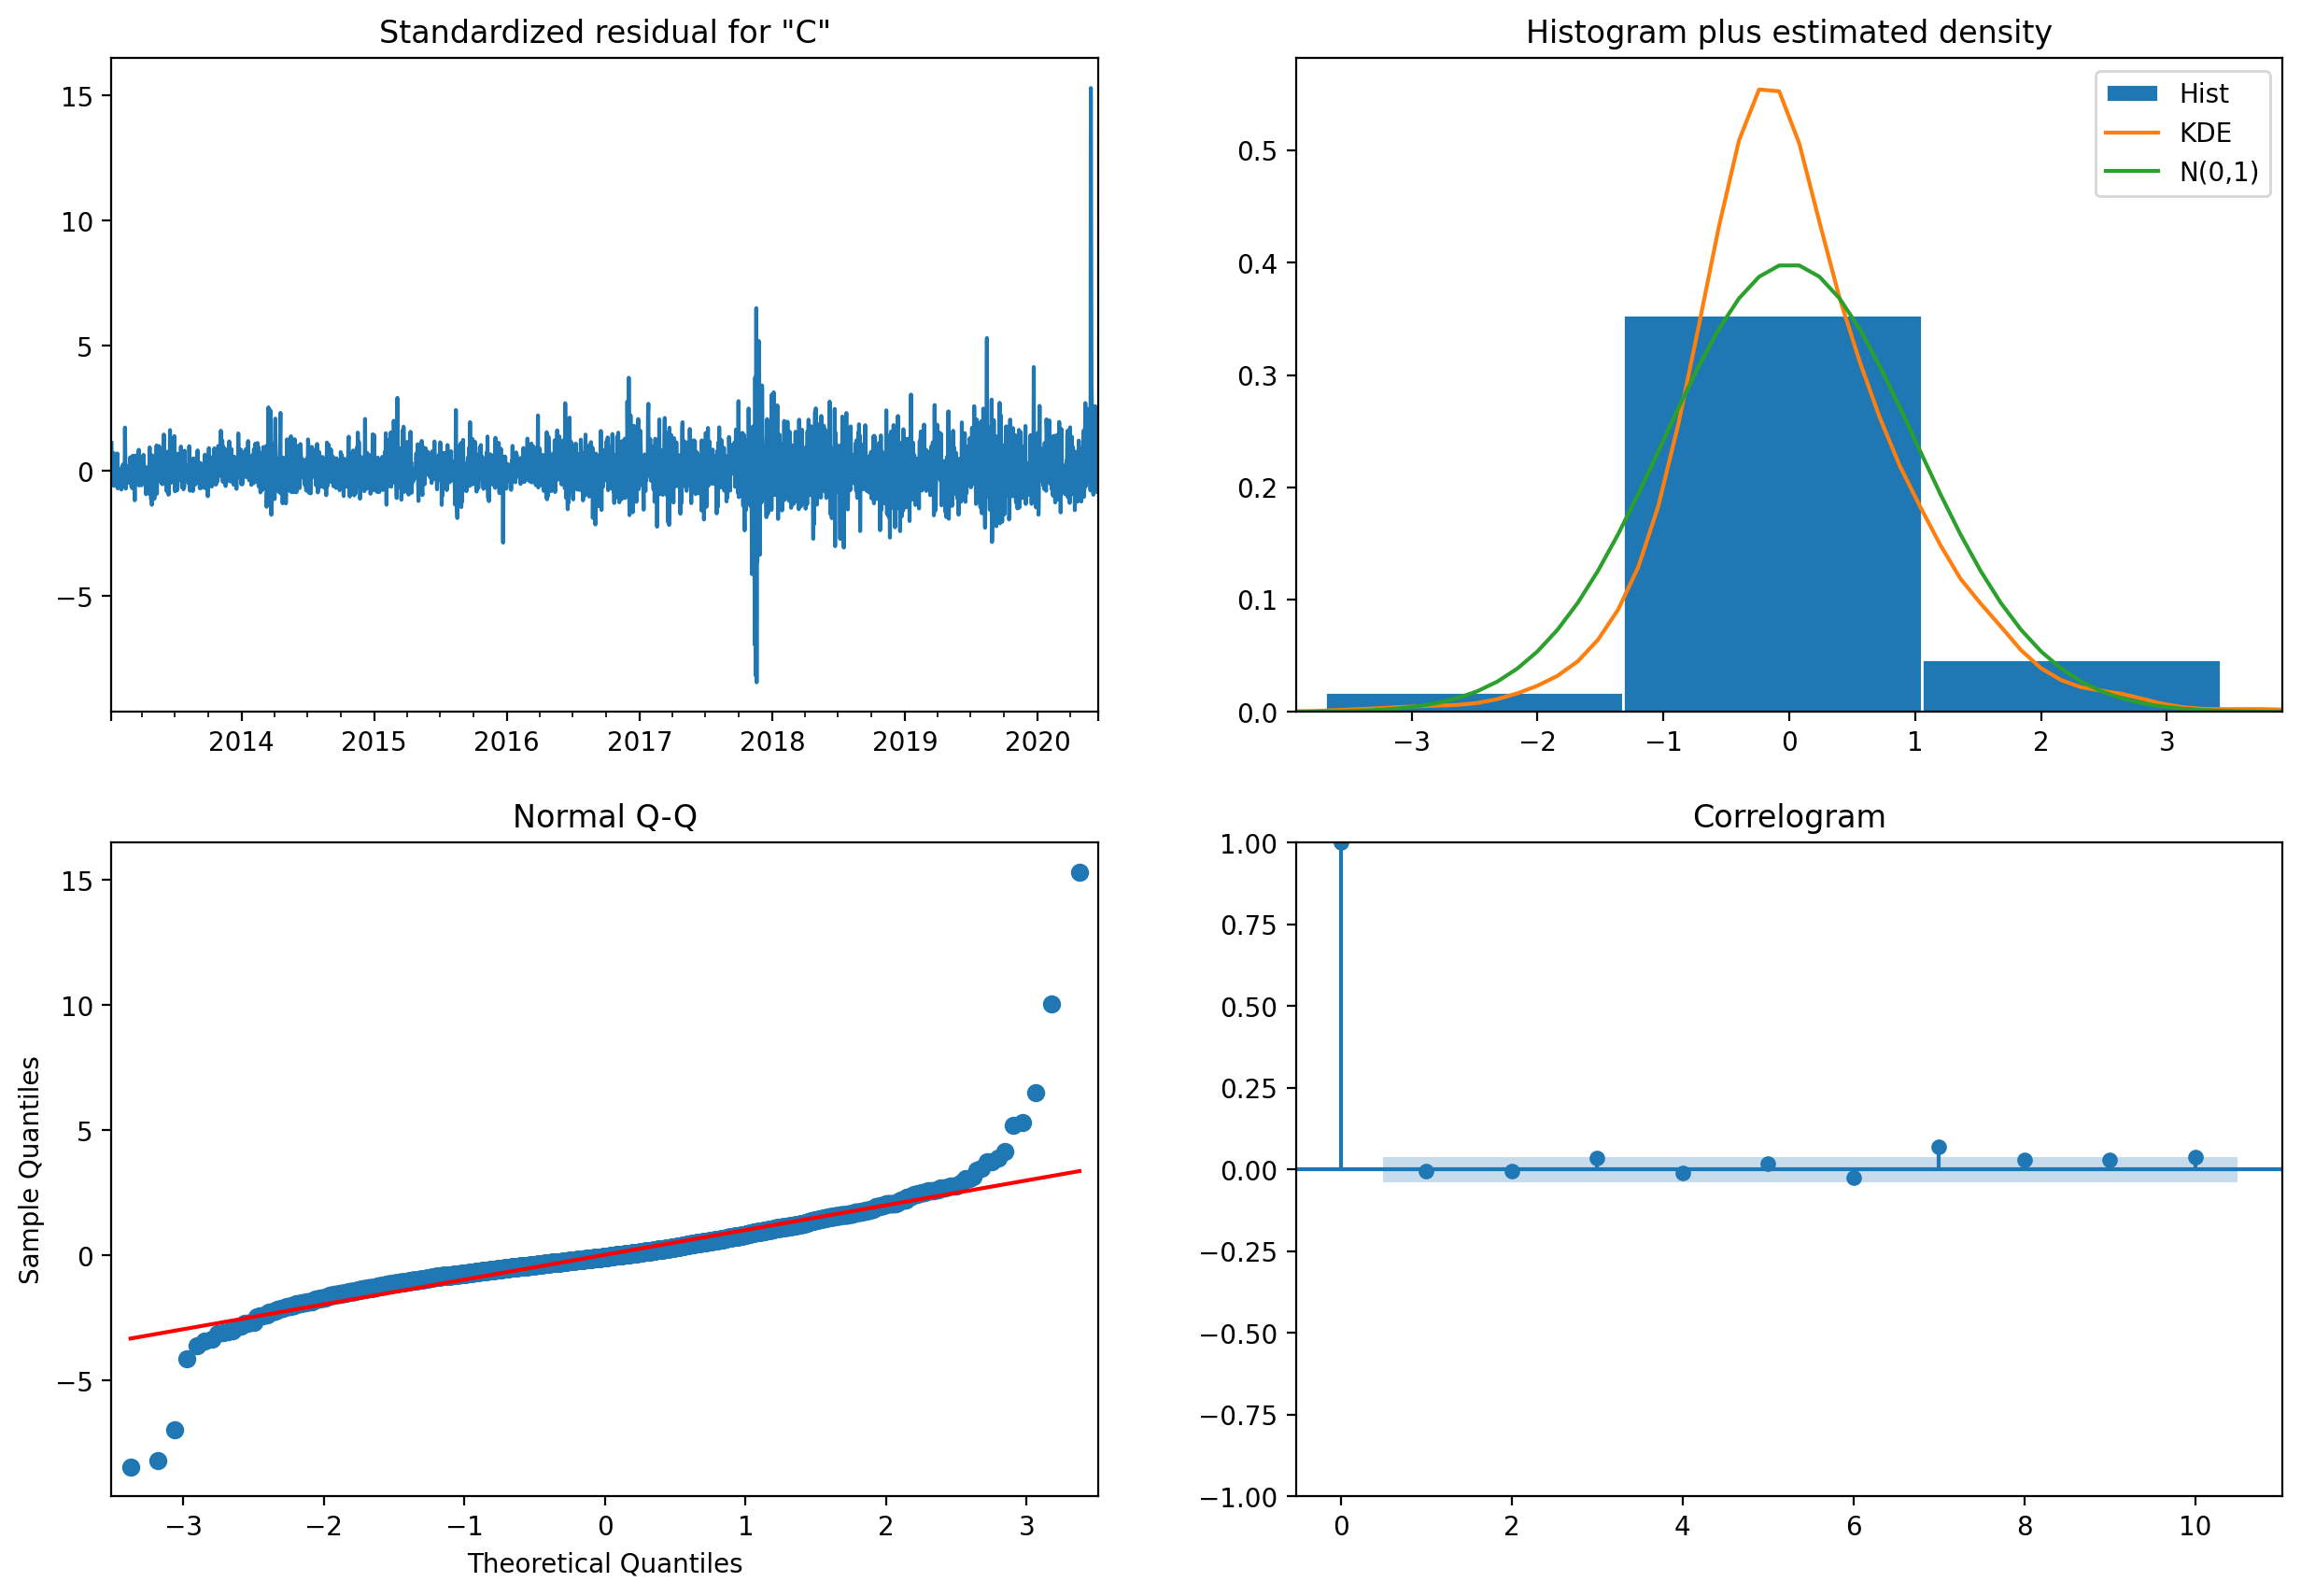

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['High', 'Low', 'USD']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['High', 'Low', 'USD']])[0]  # Inclui 'High' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2810.5423 MAE: 736.4442 MAPE: 0.64 MSE: 7899148.1434 R2: 0.874


##High+Low+Volume

In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

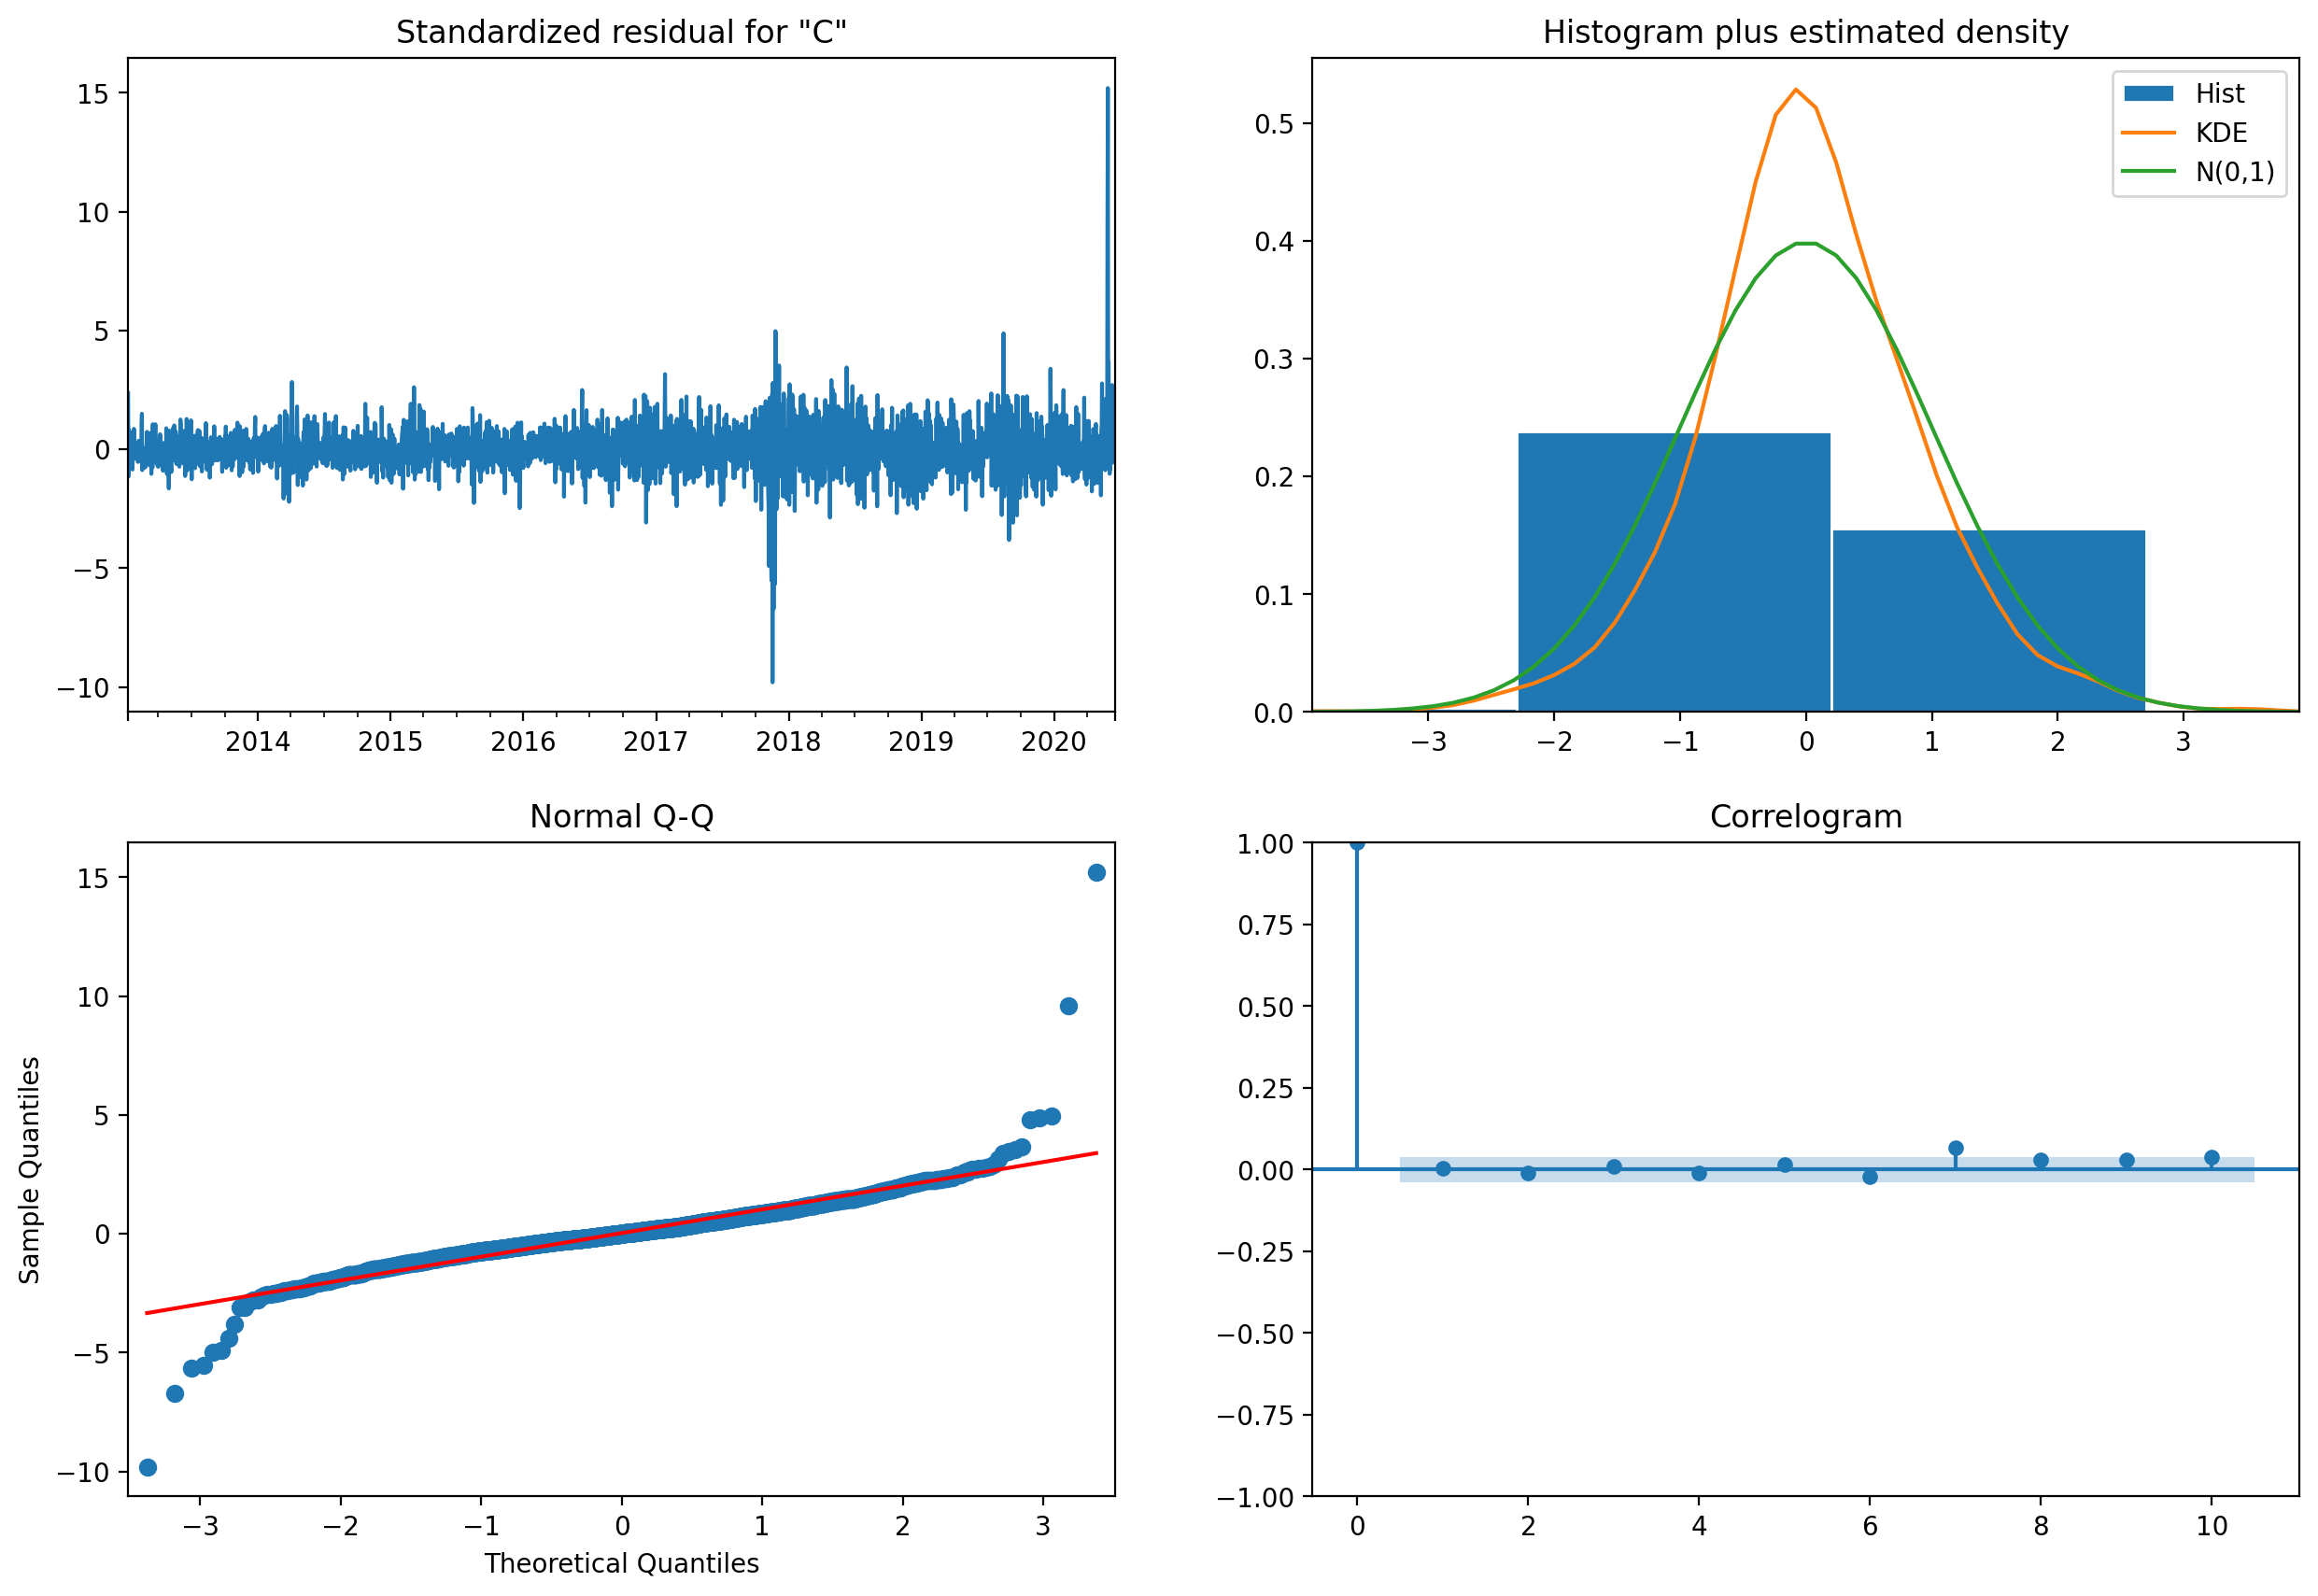

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['High', 'Low', 'Volume']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['High', 'Low', 'Volume']])[0]  # Inclui 'High' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2741.6962 MAE: 740.8541 MAPE: 0.64 MSE: 7516897.9894 R2: 0.8801


##Low+Volume+U$D

In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

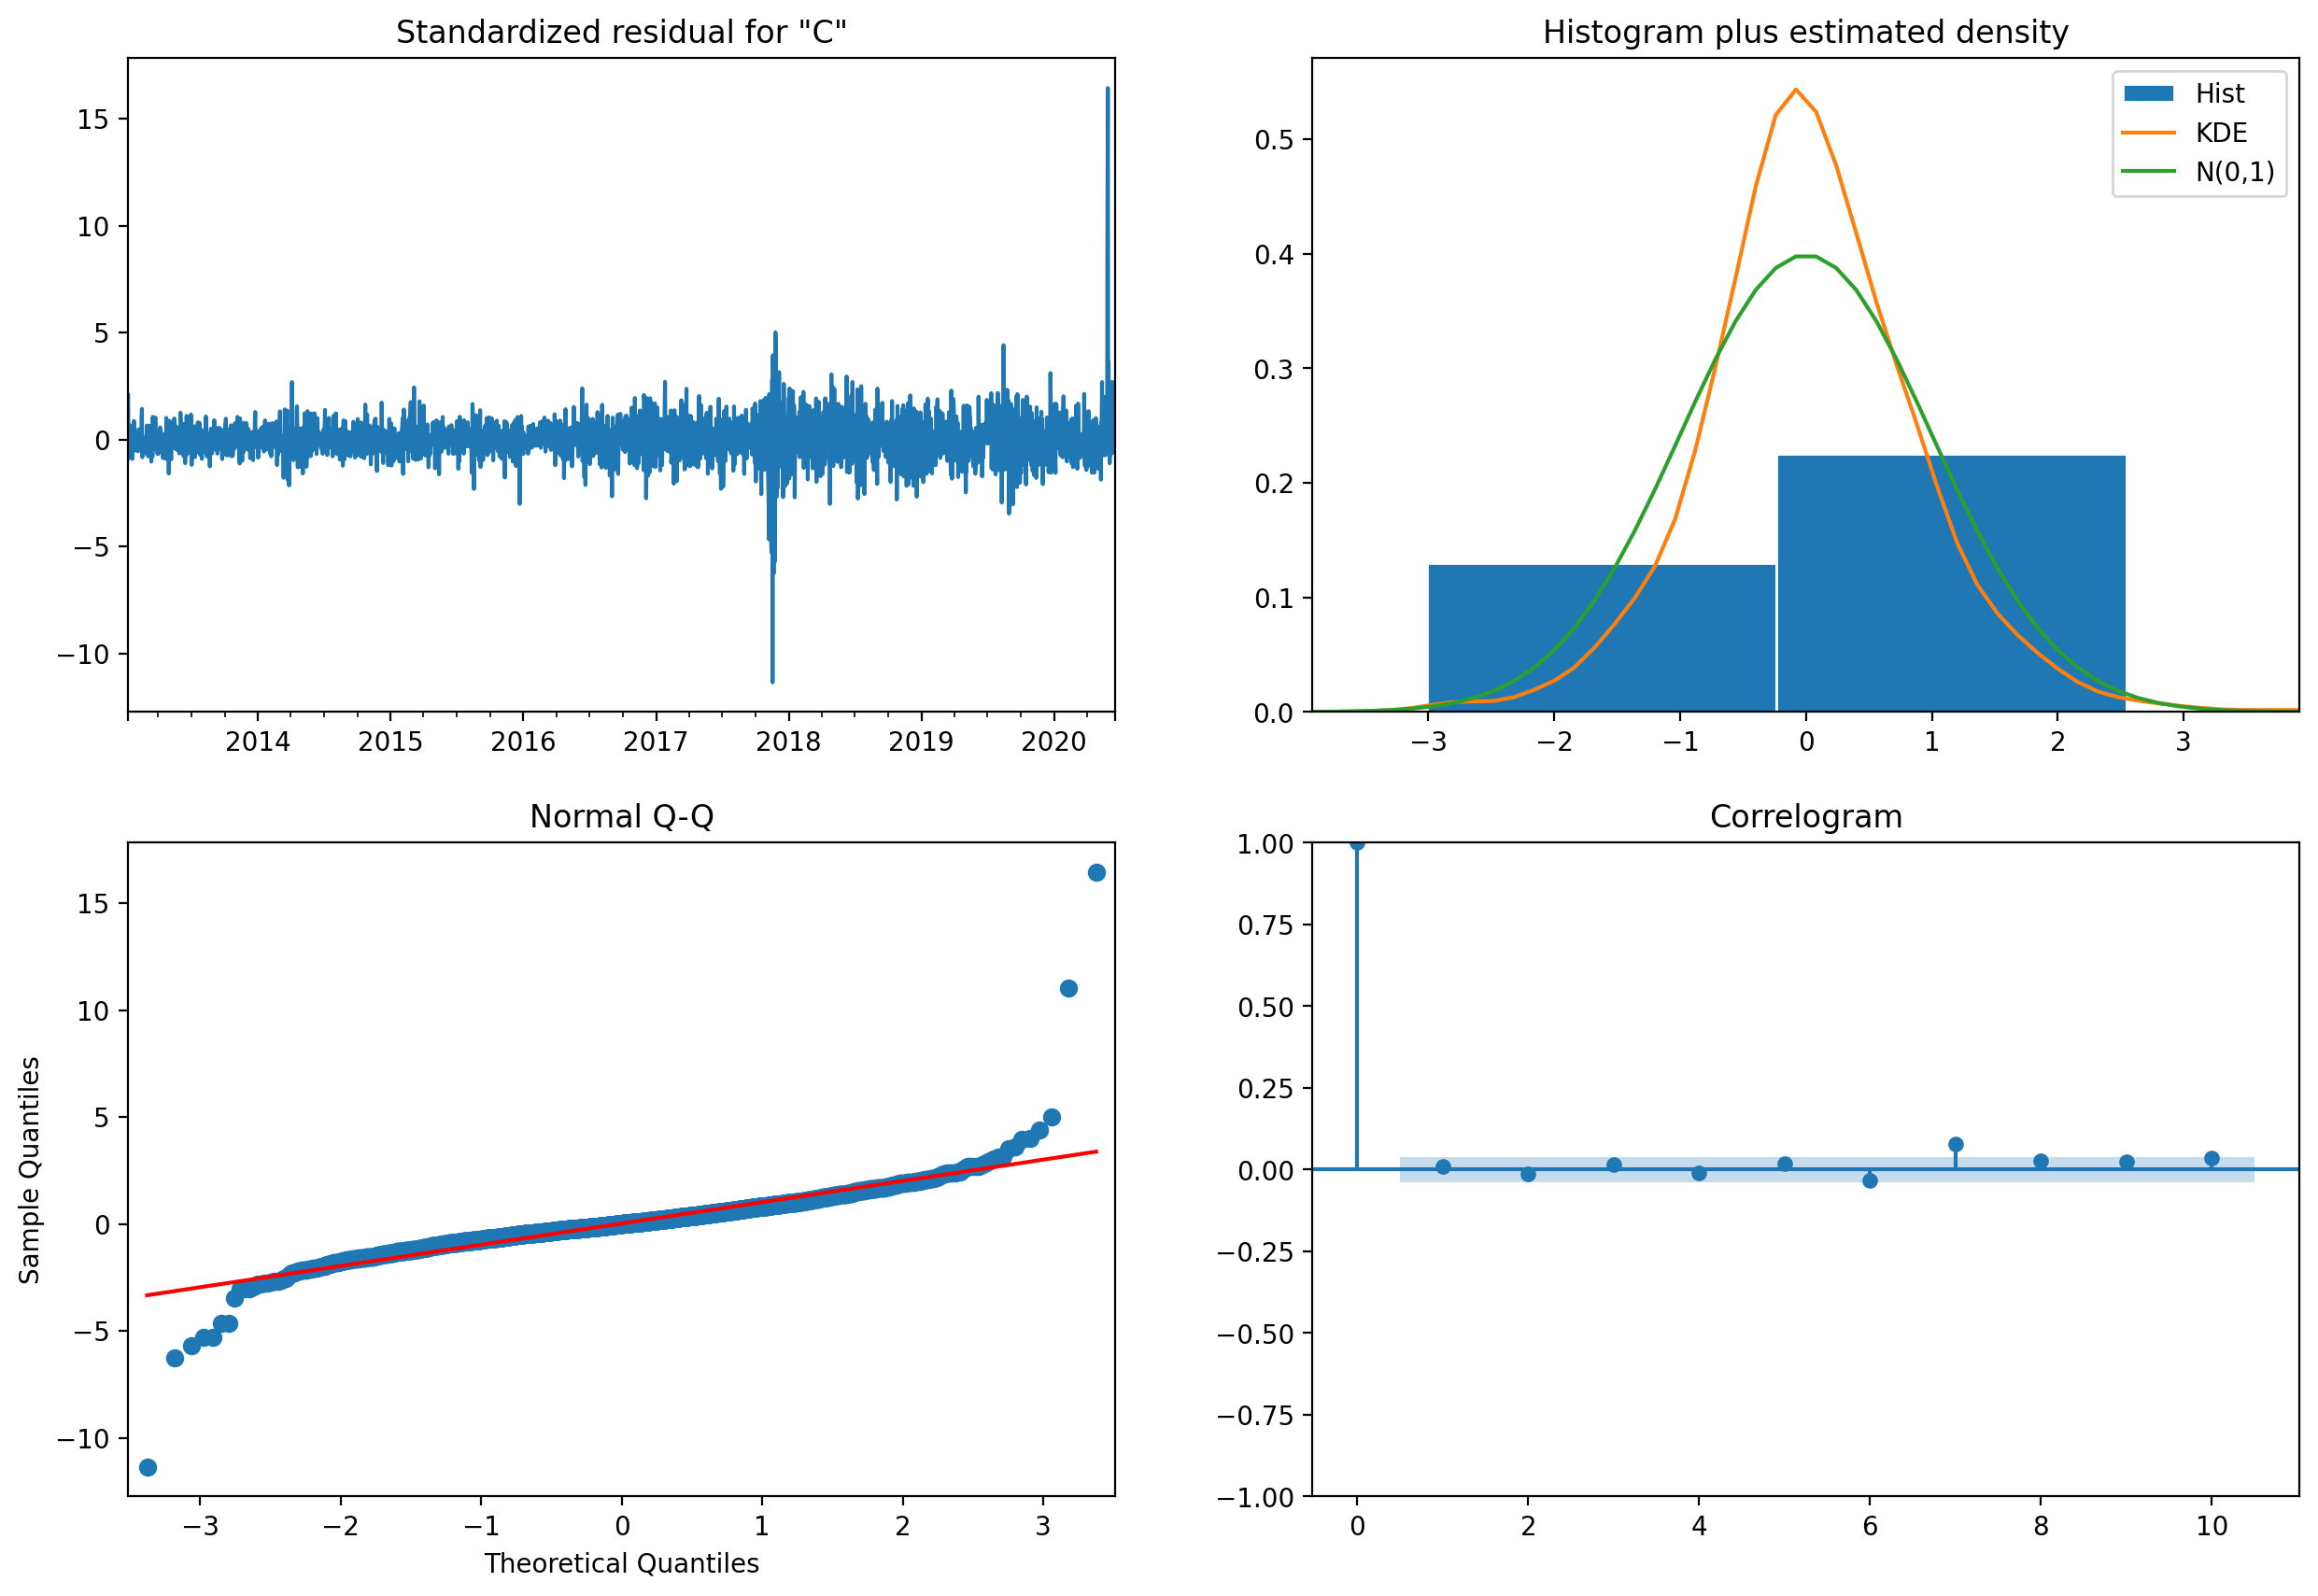

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena 'High'
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['Low', 'Volume', 'USD']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['Low', 'Volume', 'USD']])[0]  # Inclui 'High' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2991.6714 MAE: 823.0944 MAPE: 0.7100000000000001 MSE: 8950097.9379 R2: 0.8572


##High+Low+Volume+USD

In [ ]:
# Split the data into train and test sets
train_size = int(len(serie) * 0.75)
train, test = serie[:train_size], serie[train_size:]

train=2043, test=1
train=2044, test=1
train=2045, test=1
train=2046, test=1
train=2047, test=1
train=2048, test=1
train=2049, test=1
train=2050, test=1
train=2051, test=1
train=2052, test=1
train=2053, test=1
train=2054, test=1
train=2055, test=1
train=2056, test=1
train=2057, test=1
train=2058, test=1
train=2059, test=1
train=2060, test=1
train=2061, test=1
train=2062, test=1
train=2063, test=1
train=2064, test=1
train=2065, test=1
train=2066, test=1
train=2067, test=1
train=2068, test=1
train=2069, test=1
train=2070, test=1
train=2071, test=1
train=2072, test=1
train=2073, test=1
train=2074, test=1
train=2075, test=1
train=2076, test=1
train=2077, test=1
train=2078, test=1
train=2079, test=1
train=2080, test=1
train=2081, test=1
train=2082, test=1
train=2083, test=1
train=2084, test=1
train=2085, test=1
train=2086, test=1
train=2087, test=1
train=2088, test=1
train=2089, test=1
train=2090, test=1
train=2091, test=1
train=2092, test=1
train=2093, test=1
train=2094, test=1
train=2095, 

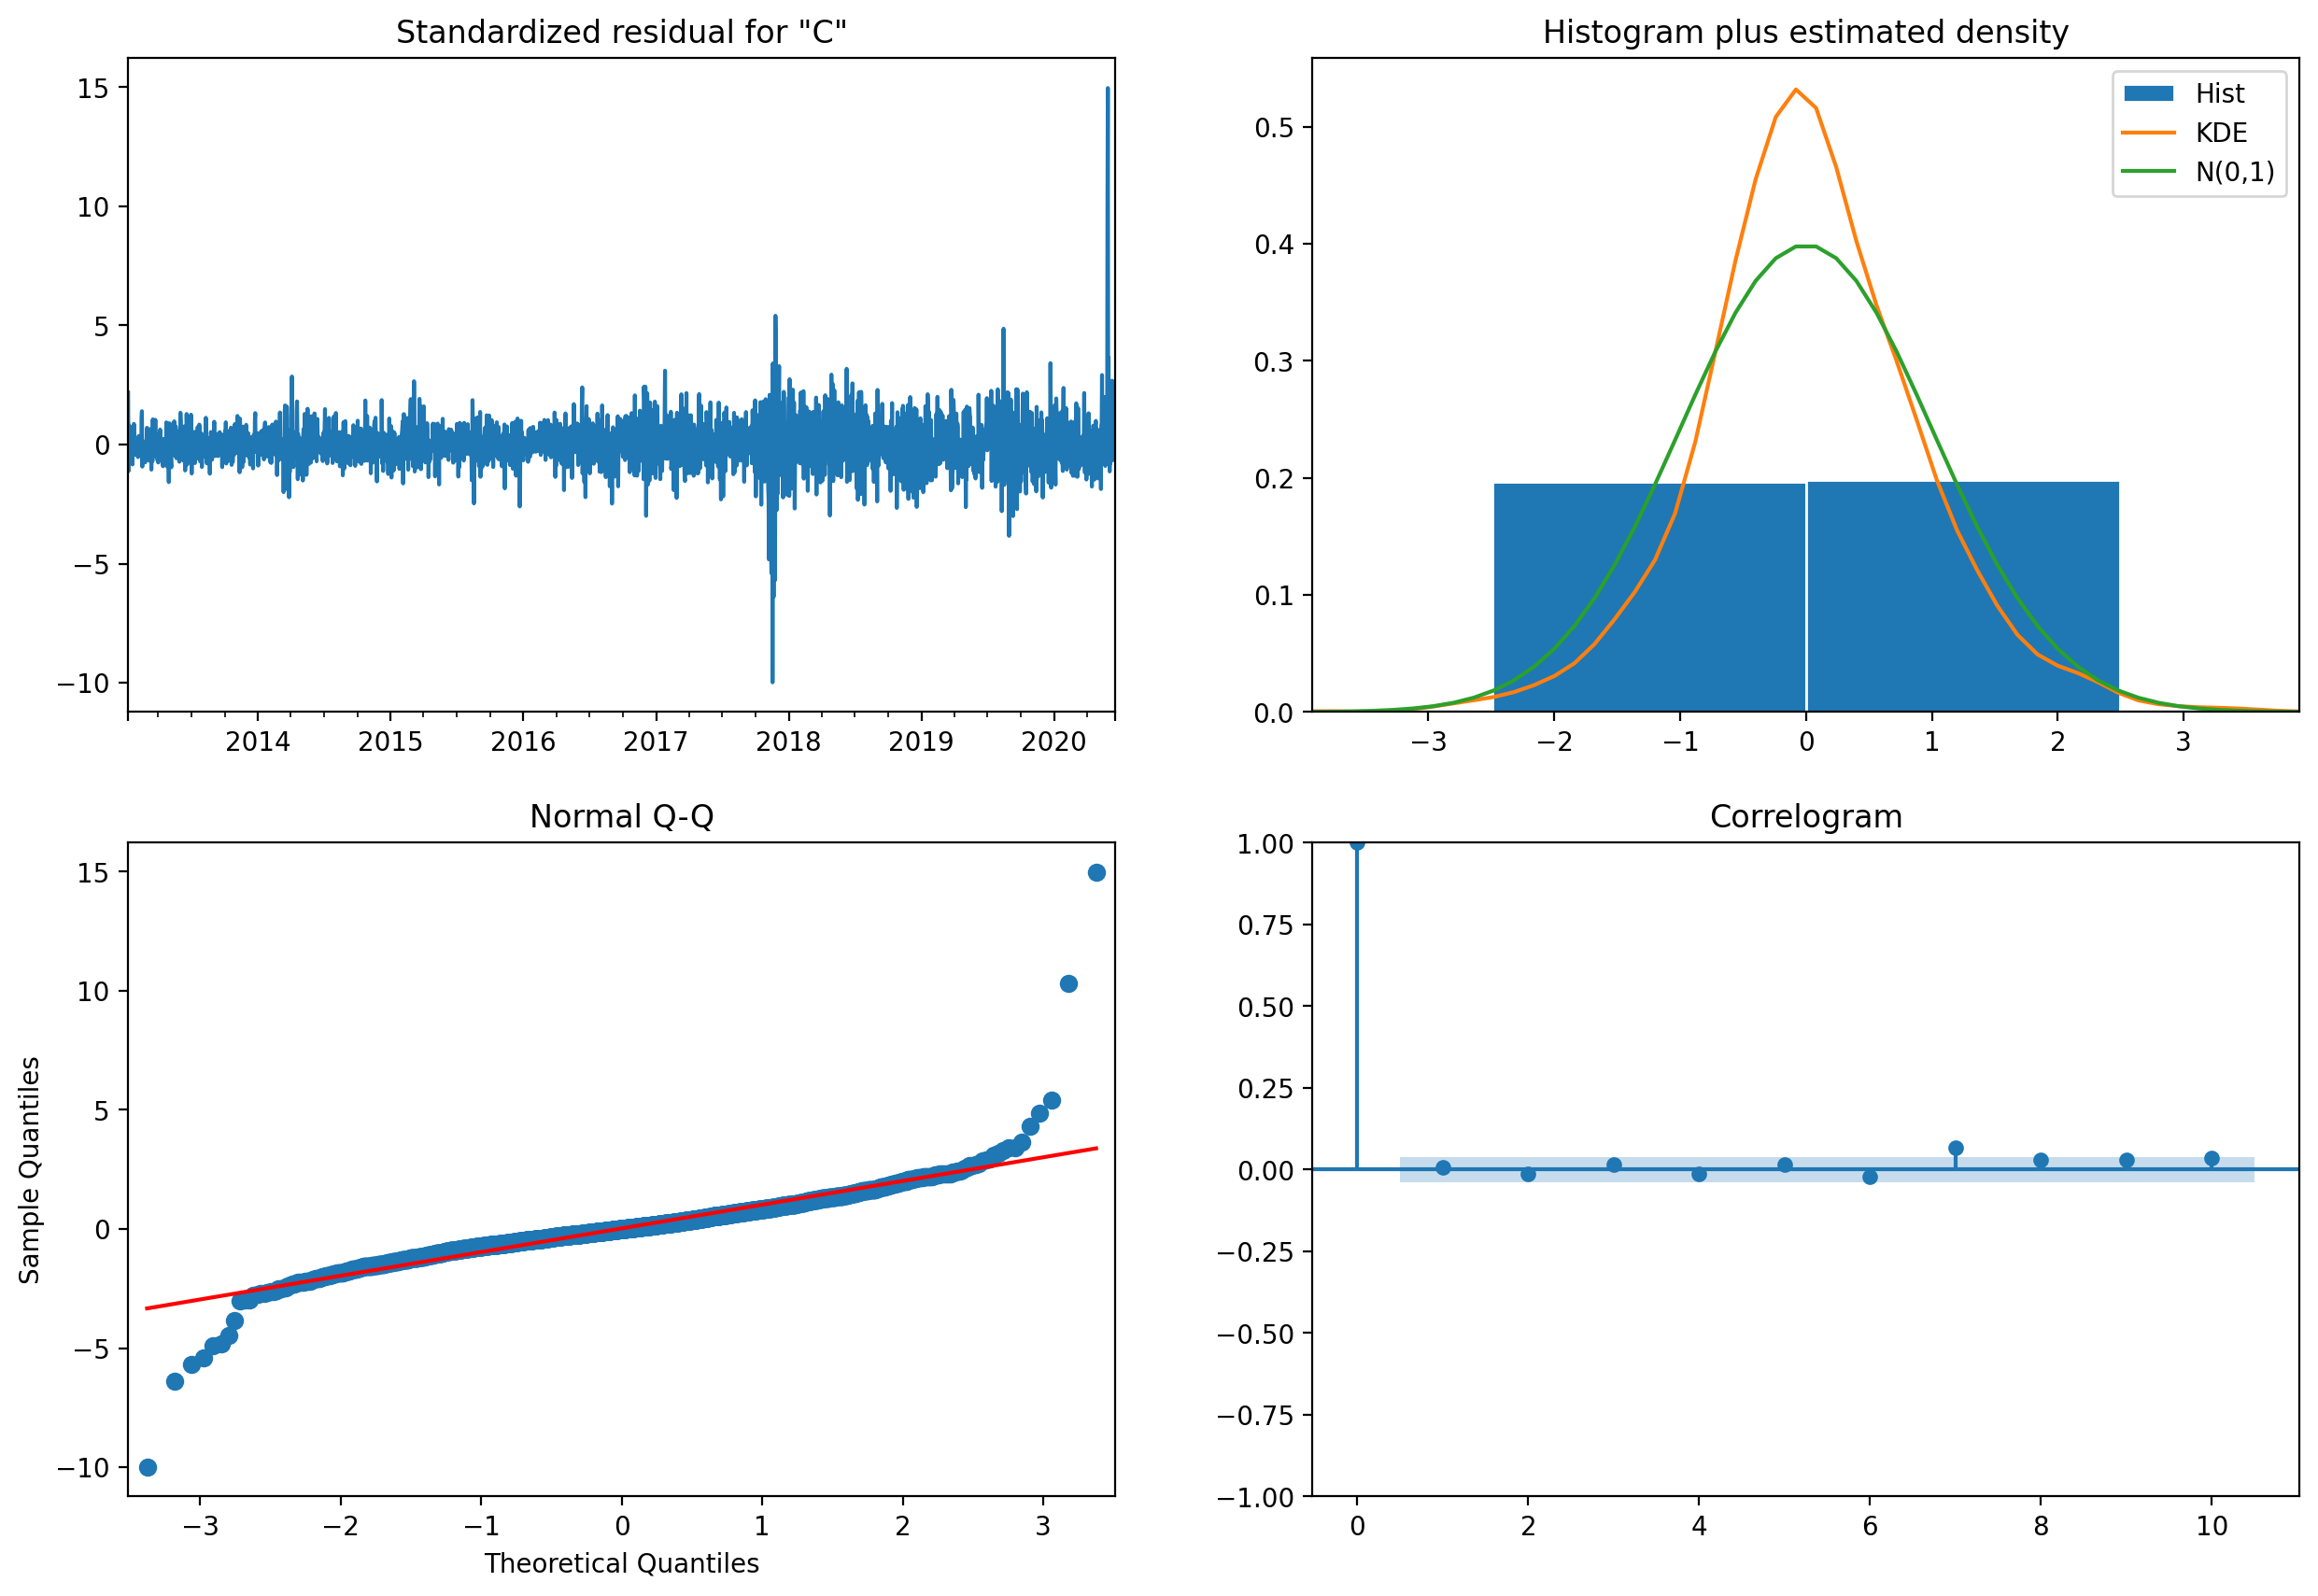

In [ ]:
# Supondo que o DataFrame `df` já esteja carregado e contêm a coluna "High" como exógena
df.index = pd.date_range(start=df['Date'][1], periods=len(df), freq='D')

predictions = []

## Best model: SARIMA(3, 1, 3)
num_train_samples = len(train)
n_records = len(df)

order = (3, 1, 3)
# trend = 'n'   # 'n' significa que não há tendência

def expanding_window():
    pred_dict = {'Real': [], 'Pred': []}
    errors = {'RMSE': [], 'MAE': [], 'MAPE': [], 'R2': []}

    for i in range(num_train_samples, n_records):
        train, test = df[0:i], df[i:i+1]
        print('train=%d, test=%d' % (len(train), len(test)))

        # Ajuste do modelo SARIMAX com a variável exógena ''High', 'Low', 'Volume', 'USD''
        model = SARIMAX(train['Close'],
                        order=order,
                        exog=train[['High', 'Low', 'Volume', 'USD']],  # Adiciona a variável exógena 'High'
                        # trend=trend,
                        freq='D',
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit(disp=-1)

        # Previsão com a variável exógena do conjunto de teste
        y = model.forecast(steps=len(test), exog=test[['High', 'Low', 'Volume', 'USD']])[0]  # Inclui ''High', 'Low', 'Volume', 'USD'' na previsão
        predictions.append(y)

        real = float(test['Close'].values[0])
        predicted = predictions[i - num_train_samples]

        pred_dict['Real'].append(real)
        pred_dict['Pred'].append(predicted)

        # Cálculo das métricas de erro
        if len(pred_dict['Real']) > 1:
            rmse = sqrt(mean_squared_error(pred_dict['Real'], pred_dict['Pred']))
            mae = mean_absolute_error(pred_dict['Real'], pred_dict['Pred'])
            mape = mean_absolute_percentage_error(pred_dict['Real'], pred_dict['Pred'])
            r2 = r2_score(pred_dict['Real'], pred_dict['Pred'])

            errors['RMSE'].append(rmse)
            errors['MAE'].append(mae)
            errors['MAPE'].append(mape)
            errors['R2'].append(r2)

    df_exp_window = pd.DataFrame(pred_dict)

    # Plotando os diagnósticos do modelo
    residuals = model.resid
    model.plot_diagnostics()
    fig = plt.gcf()
    fig.set_size_inches(15, 10)
    plt.show()

    return df_exp_window, errors

df_exp_window, errors = expanding_window()

In [ ]:
# Resultados com expanding window
rmse = round(sqrt(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred'])), 4)
mae = round(mean_absolute_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mape = round(mean_absolute_percentage_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
mse = round(mean_squared_error(df_exp_window['Real'], df_exp_window['Pred']), 4)
r2 = round(r2_score(df_exp_window['Real'], df_exp_window['Pred']), 4)

# Exibindo os resultados
print('RMSE:', rmse, 'MAE:', mae, 'MAPE:', mape * 100, 'MSE:', mse, 'R2:', r2)

RMSE: 2769.8627 MAE: 762.8149 MAPE: 0.66 MSE: 7672139.378 R2: 0.8776


# Resultados

In [ ]:
import pandas as pd

# Dados fornecidos corrigidos
data = {
    "Metric": ["Close", "High", "Low", "Volume", "U$D", "High+Low", "High+Volume", "High+U$D",
               "Low+Volume", "Low+U$D", "Volume+U$D", "High+Low+U$D", "High+Low+Volume",
               "Low+Volume+USD", "High+Low+Volume+USD"],
    "RMSE": [1370.4918, 2698.8529, 2608.2509, 2104.3159, 1370.9158, 2674.6539, 2350.8892,
             2350.8892, 3040.7699, 2671.0004, 2090.3894, 2810.5423, 2741.6962, 2991.6714,
             2769.8627],
    "MAE": [1085.9085, 793.633, 751.7891, 1646.2684, 1085.8787, 711.8704, 948.0421,
            948.0421, 822.0317, 779.1461, 1641.8908, 736.4442, 740.8541, 823.0944,
            762.8149],
    "MAPE": [0.97, 0.69, 0.65, 1.46, 0.97, 0.62, 0.83, 0.83, 0.71, 0.68, 1.46,
             0.64, 0.64, 0.71, 0.66],
    "MSE": [1878247.8235, 7283806.8727, 6802972.7738, 4428145.3646, 1879410.0359,
            7153773.5637, 5526679.8254, 5526679.8254, 9246281.4111,
            7134243.0179, 4369727.7907,
            7899148.1434,
            7516897.9894,
            8950097.9379,
            7672139.378],
    "R2": [0.97, 0.8838, 0.8915, 0.9294, 0.97, 0.8859, 0.9118, 0.9118, 0.8525, 0.8862, 0.9303, 0.874, 0.8801, 0.8572, 0.8776]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Salvar em CSV
#df.to_csv('metrics_results.csv', index=False)

#print("Tabela salva em 'metrics_results.csv'")



In [ ]:
print(df)

                 Metric       RMSE        MAE  MAPE           MSE      R2
0                 Close  1370.4918  1085.9085  0.97  1.878248e+06  0.9700
1                  High  2698.8529   793.6330  0.69  7.283807e+06  0.8838
2                   Low  2608.2509   751.7891  0.65  6.802973e+06  0.8915
3                Volume  2104.3159  1646.2684  1.46  4.428145e+06  0.9294
4                   U$D  1370.9158  1085.8787  0.97  1.879410e+06  0.9700
5              High+Low  2674.6539   711.8704  0.62  7.153774e+06  0.8859
6           High+Volume  2350.8892   948.0421  0.83  5.526680e+06  0.9118
7              High+U$D  2350.8892   948.0421  0.83  5.526680e+06  0.9118
8            Low+Volume  3040.7699   822.0317  0.71  9.246281e+06  0.8525
9               Low+U$D  2671.0004   779.1461  0.68  7.134243e+06  0.8862
10           Volume+U$D  2090.3894  1641.8908  1.46  4.369728e+06  0.9303
11         High+Low+U$D  2810.5423   736.4442  0.64  7.899148e+06  0.8740
12      High+Low+Volume  2741.6962   7

Close

RMSE: 1370.4918 MAE: 1085.9085 MAPE: 0.97 MSE: 1878247.8235 R2: 0.97

High

RMSE: 2698.8529 MAE: 793.633 MAPE: 0.69 MSE: 7283806.8727 R2: 0.8838

Low

RMSE: 2608.2509 MAE: 751.7891 MAPE: 0.65 MSE: 6802972.7738 R2: 0.8915

Volume

RMSE: 2104.3159 MAE: 1646.2684 MAPE: 1.46 MSE: 4428145.3646 R2: 0.9294

U$D

RMSE: 1370.9158 MAE: 1085.8787 MAPE: 0.97 MSE: 1879410.0359 R2: 0.97

High+Low

RMSE: 2674.6539 MAE: 711.8704 MAPE: 0.62 MSE: 7153773.5637 R2: 0.8859

High+Volume

RMSE: 2350.8892 MAE: 948.0421 MAPE: 0.83 MSE: 5526679.8254 R2: 0.9118

High+U$D

RMSE: 2350.8892 MAE: 948.0421 MAPE: 0.83 MSE: 5526679.8254 R2: 0.9118

Low+Volume

RMSE: 3040.7699 MAE: 822.0317 MAPE: 0.7100000000000001 MSE: 9246281.4111 R2: 0.8525

Low+U$D

RMSE: 2671.0004 MAE: 779.1461 MAPE: 0.6799999999999999 MSE: 7134243.0179 R2: 0.8862

Volume+U$D

RMSE: 2090.3894 MAE: 1641.8908 MAPE: 1.46 MSE: 4369727.7907 R2: 0.9303

High+Low+U$D

RMSE: 2810.5423 MAE: 736.4442 MAPE: 0.64 MSE: 7899148.1434 R2: 0.874

High+Low+Volume

RMSE: 2741.6962 MAE: 740.8541 MAPE: 0.64 MSE: 7516897.9894 R2: 0.8801

Low+Volume+USD

RMSE: 2991.6714 MAE: 823.0944 MAPE: 0.7100000000000001 MSE: 8950097.9379 R2: 0.8572

High+Low+Volume+USD

RMSE: 2769.8627 MAE: 762.8149 MAPE: 0.66 MSE: 7672139.378 R2: 0.8776